**Main Quest 04 - CV - ver.2**

---

# 폐렴아 기다려라! [프로젝트]
- 딥러닝 기술을 활용해 의료 영상을 분석
- [캐글 노트북](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays)을 기반으로 작성된 노드를 학습후 폐렴 진단기의 성능을 개선한다

**[프로젝트 목표]**
1. 성능을 개선한 모델 디자인 실습
    - regularization, augmentation 등의 기법을 활용
2. ResNet 모델 구현


👉 **Cureus 저널의 [Convolutional Neural Networks (CNNs) for Pneumonia Classification on Pediatric Chest Radiographs](https://arc.net/l/quote/hgfxtxcq)을 참고해서 모델 디자인해볼 예정**

---
---
    
# ❇️ 퀘스트 이후 논문과 기타 자료를 천천히 공부하면서 작성한 두번째 버전 노트북

**[문제점]**
- 이번 프로젝트 노드는 내가 무슨 작업을 하고 있는지 제대로 이해하기가 어려웠다.
    - 원인 1. 텐서플로우 텐서 형식 사용
        - 데이터를 텐서플로우 텐서로 변환해서 사용하면서 익숙하게 사용했던 라이브러리의 기능을 사용하기 어려웠다.
            - data augmentation 부분에서 시간을 많이 썼지만 하고 싶었던 기능을 제대로 구현하지 못했다.
        - 시간이 모자르다는 압박감에 이 부분에 대한 기본적인 내용을 인지하지 못한채 노드에 써져있는 코드를 그대로 실행시키고 넘어갔다.
        - 결국 내가 무슨 작업을 하고 있는지 정리가 잘 안됬고, 마음이 급해져서 정신없이 GPT나 구글링으로 문제를 해결하는데만 집중하게 되었다.
    - 원인 2. 익숙하지 않은 변수명 선언 방식과 낯선 함수들
        - 사실 대문자 변수를 보고 놀랐다. camel case방식이 아닌 대문자로만 되어있는 변수라니. 지금 생각해보면 환경변수처럼 사용하니까 대문자로만 쓴걸까 하고 상상을 해보지만 당시엔 혼란스러워지는 원인중 하나가 되었다.
        - gpu를 사용하기위한 처음 보는 함수가 많았는데 역시나 익숙하지 않은 코드라인들로 마음이 더욱 혼란해졌다.
    - 원인 3. ResNet18 구조도를 읽지 못함
        - 노드에서 그래프를 2개 보여주고 그걸 만들어보라고 제시했는데, 그래프에서 정보를 읽어내지 못했다.(stride는 몇으로 맞춰야하는지, `x2`는 무슨 의미인지..) .
        - 이번 모듈에서 ResNet의 skip connection에 대해 공부하면서 해당 블록을 코드로 만들어봤지만 세부적으로 구조에 대해서는 공부가 미흡했다.
    - 원인 4. 모델 구성 방식 혼란
        - Sequential, Functional API를 모두 사용하면서 공부해서 익숙하다고 생각했는데, Functional 방식의 코드를 Sequential 방식으로 변환하려니 input layer에 대한 정보는 어떻게 만들어야하는지, 블록으로 떼어낸 경우 무슨 값을 리턴해줘야하는지 정리가 되지 않아서 헤맸다.

## ❇️ [ver.2 목표]

- 작성했던 코드를 다시 천천히 살펴보고 필요한 관련 개념을 정리한다
- Data augmentation을 다시 진행해본다
- ResNet18 구조를 다시 복습하고 이해한다
- 재현율은 매우 높지만 정확도가 70% 즈음이었어서 정확도를 조금 더 높여본다.

**참고** : 이 노트북에서 새로 생성한 코드나 내용은 ❇️ 표시를 붙였다

---
---

[Tensorflow Tensor]
- 기본 개념 [블로그](https://limjun92.github.io/assets/TensorFlow%202.0%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/1.%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%20%EA%B8%B0%EB%B3%B8%20-%20%EB%A7%9E%EC%B6%A4%20%EC%84%A4%EC%A0%95/%5B%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC1%5D%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%20%EA%B8%B0%EB%B3%B8(%ED%85%90%EC%84%9C,%20tf.data.Dataset)

[ResNet18]
- [DeeplearningAI Resnets](https://www.youtube.com/watch?v=ZILIbUvp5lk&t=3s) 강의
- [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf) 논문
- [[IJCRT]ResNet18 Model with wequential layer for computing accuracy on image classification dataset](https://ijcrt.org/papers/IJCRT2205235.pdf) 논문
-[blog](https://medium.com/analytics-vidhya/resnet-understand-and-implement-from-scratch-d0eb9725e0db)
- [Kaggle notebook](https://www.kaggle.com/code/songrise/implementing-resnet-18-using-keras)



---
## 데이터셋
[Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
- 캐글의 Chest X-Ray Images

**데이터 구성**
- `~/aiffel/chest_xray/data` 하위에 3개의 폴더 (train, test, val)로 구성
- 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함
- X-Ray 이미지(JPEG) : 5,856
    - 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X선 영상
- label : 2개 - 폐렴 / 정상
- 전체 데이터의 크기 : 대략 총 1.2GB

[참고] 캐글에서 다운로드한 데이터에는 데이터가 일부 중복되어있으니 주의

---

### 폐렴이란?
- 폐에 염증이 생긴것
> 염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처 부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.<br>
> 출처 : https://ko.wikipedia.org/wiki/염증

👉 폐에서 백혈구가 바이러스나 세균과 싸우면서 염증이 생긴다

---
**폐렴구분**
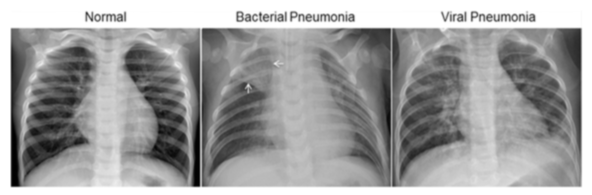
- 정상적인 흉부 X-RAY(왼쪽): 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여줌
- 세균성 폐렴 (가운데): 일반적으로 오른쪽 상부엽(흰색 화살표)에 나타남
- 바이러스성 폐렴 (오른쪽): 양쪽 폐에서 보다 확산된 "interstitial(조직 사이에 있는)" 패턴

👉 이 패턴을 잘 읽어내는 딥러닝 알고리즘을 만들어보자!

---
## ~CNN Model~ <span class="mark">Data Set-up</span>
~### Set-up~

In [1]:
# import pakages
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

**수정사항**
- image size : 224x224
- batch size : 32
- epoch : 30

In [2]:
# necessary variables
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [224, 224] 

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

BATCH_SIZE = 32   
EPOCHS = 30      

print(ROOT_PATH)

/aiffel/aiffel


---

❇️ 
- 위에서 지정한 변수는 모두 값이 바뀌지 않는 constants들이다. 그래서 모두 대문자를 사용

<span class="mark">`Constants`</span><br>
> A Python Constant is a variable whose value cannot be changed throughout the program.

**[constants 생성 규칙]**
- 값이 바뀌지 않는 변수를 `constants`로 지정한다. 
- 변수명은 대문자만 사용하고 `_`를 제외한 특수문자는 사용하지 않는다.
- 숫자로 시작하지 않는다.<br>
[참고](https://www.toppr.com/guides/python/python-introduction/variables-constants-literals/python-variables-constants-and-literals/)


---

---

❇️ `AUTOTUNE = tf.data.experimental.AUTOTUNE`
- 그런가보다하고 지나갔는데 아래 부분 코드를 작성할때 이 변수를 왜 사용하는지 제대로 이해가 안됬고, 내 스타일로 코드를 수정하는 과정에서 걸림돌이 되었다.

> When you set buffer_size to tf.data.experimental.AUTOTUNE, TensorFlow will attempt to optimize the buffer size based on the available memory and computational resources. 
> (chatGPT)

- 텐서플로우 공식문서를 보면 텐서플로우 파이프라인을 빌드할때 설정할수 있는 변수이다.

**[참고]**
- [TensorFlow](https://www.tensorflow.org/guide/data_performance)
- chatGPT
- [blog](https://ahnjg.tistory.com/32)

---

## Load data
- 데이터 디렉토리 구조
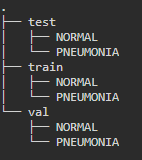

### data split

In [3]:
# 디렉토리별 데이터 개수 확인
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

train_count = len(train_filenames)
test_count = len(test_filenames)
val_count = len(val_filenames)

print("train:", train_count)
print("test:", test_count)
print("validation:", val_count)

train: 5216
test: 624
validation: 16


---

`tf.io.gfile.glob` : PATH에 있는 파일을 `train_filenames`에 담는다

---


In [4]:
train_filenames[:5]

['/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-0487-0001.jpeg',
 '/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-0987-0001.jpeg',
 '/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0700-0001.jpeg',
 '/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg',
 '/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0674-0001.jpeg']

---

**[정리]**
- `train_filenames`, `test_filenames`, `val_filenames`에는 해당 데이터 카테고리의 이미지들 주소가 담겨있다.

---

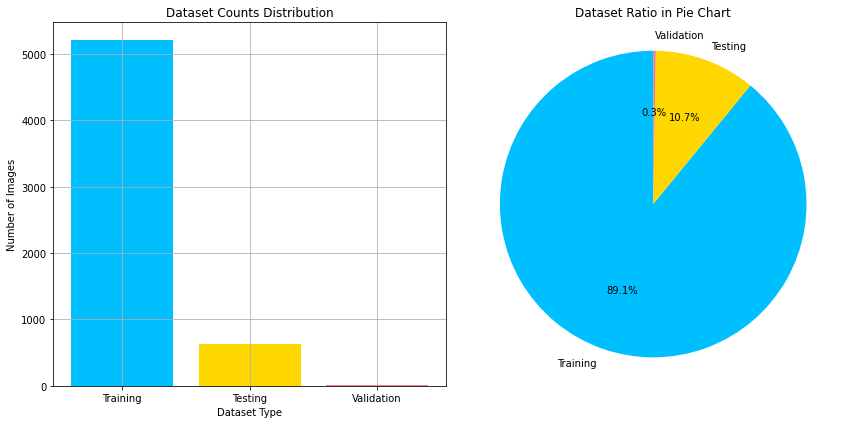

In [5]:
# visualize dataset
import matplotlib.pyplot as plt

# Prepare Data for Visualization
labels = ["Training", "Testing", "Validation"]
counts = [train_count, test_count, val_count]
colors = ["deepskyblue", "gold", "lightcoral"]  # Choose distinct colors for clarity

# Create the charts
plt.figure(figsize=(12, 6))  

# Bar Chart
plt.subplot(121)
plt.bar(labels, counts, color=colors)
plt.xlabel("Dataset Type")
plt.ylabel("Number of Images")
plt.title("Dataset Counts Distribution")
plt.grid(True)  # Add gridlines for visual reference
# plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Create the pie chart
plt.subplot(122)  # Position the pie chart in the second subplot
plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Dataset Ratio in Pie Chart")
plt.axis("equal")  # Ensure a circular pie chart

# Adjust layout for better visualization
plt.tight_layout()  # Prevent overlapping elements

# Display the combined chart
plt.show()

- train: 89%
- test : 10.7%
- validation :0.3%
    - validation이 너무 없어서 train 데이터 일부를 가져옴
        - train과 val에 있는 데이터를 모은 다음에 
        - train : val를 80:20으로 분할

In [6]:
# train 데이터와 validation 데이터를 모두 filenames에 담기
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

train_count = len(train_filenames)
val_count = len(val_filenames)

print("train:", train_count)
print("validation:", val_count)

train: 4185
validation: 1047


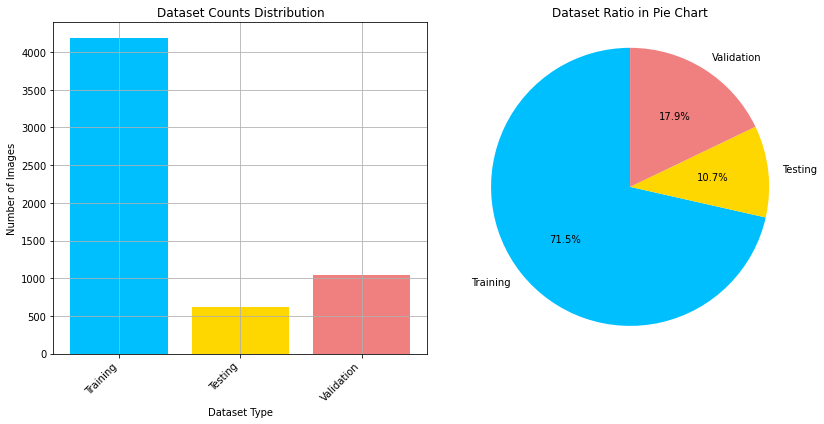

In [7]:
# 다시 데이터수 그래프로 확인
# Prepare Data for Visualization
labels = ["Training", "Testing", "Validation"]
counts = [train_count, test_count, val_count]
colors = ["deepskyblue", "gold", "lightcoral"]

# Create the charts
plt.figure(figsize=(12, 6))  

# Bar Chart
plt.subplot(121)
plt.bar(labels, counts, color=colors)
plt.xlabel("Dataset Type")
plt.ylabel("Number of Images")
plt.title("Dataset Counts Distribution")
plt.grid(True)  # Add gridlines for visual reference
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Create the pie chart
plt.subplot(122)  # Position the pie chart in the second subplot
plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Dataset Ratio in Pie Chart")
plt.axis("equal")  # Ensure a circular pie chart

# Adjust layout for better visualization
plt.tight_layout()  # Prevent overlapping elements

# Display the combined chart
plt.show()

- 적절한 비율로 수정되었다

### train 데이터 안에 정상 이미지 수와 폐렴 이미지 수 확인

In [8]:
# 파일 경로에서 정상이미지, 폐렴 이미지 구분 힌트얻기
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0450-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person1345_bacteria_3422.jpeg


- train 디렉토리에 `NORMAL`, `PNEUMONIA` 폴더로 이미지가 구분되어있다
    - 파일 이름에 `NORMAL`이 있는 이미지는 -> 정상이미지
    - 파일 이름에 `PNEUMONIA`이 있는 이미지는 -> 폐렴이미지

In [9]:
# 정상이미지
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

# 폐렴이미지
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1070
Pneumonia images count in training set: 3115


- 정상보다 폐렴 이미지수가 3배 정도 더 많다
- 데이터 클래스별 balance가 좋아야 좋은 학습결과가 나온다
    - ✅ 데이터 클래스 balance 조정필요
- test, validation 데이터셋은 평가용이기때문에 학습과 관련이 없다 = imbalance 데이터셋이어도 문제 X

---

**수정사항**
- ~data augmentation을 진행할때 텐서형식의 이미지파일이라 제약이 많았다.~
- ~data augmentation 작업 이후에 미니배치를 생성한다.~

## ~Data Preprocessing 1 - Data augmentation~

**첫번쨰 시도**
<span class="mark">**ImageDataGenerator 사용**</span>
- `flow_from_directory()`를 사용해서 generator 생성
    - datagenerator.flow_from_directory() : 해당 경로에 있는 image load + datagenerator 진행<br>
    - 이미지가 특정 폴더 안에 분류되어 있으면 subdirectory의 이름에서 target class를 자동으로 만들어냄
    
**[참고]**
- [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#used-in-the-notebooks)
- [blog](https://techblog-history-younghunjo1.tistory.com/261)
- [blog](https://libertegrace.tistory.com/entry/3-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95%EA%B8%B0%EB%B2%95-Data-Augmentation)
- [blog](https://ysyblog.tistory.com/152)

In [13]:
# # set data generator
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # train generator
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    zoom_range = 0.1,
#                                    horizontal_flip=True)
# # test generator
# test_datagen = ImageDataGenerator(rescale=1./255)

👉 처음엔 익숙한 `ImageDataGenerator`로 데이터 augmentation을 진행하려고 했는데, 도대체 왜 이런 에러가 나오는지 이해가 안되는 무수한 에러를 만났다. 자료를 찾아다가 문득 `ImageDataGenerator`의 데이터 생성 방식이 tf.Data pipeline을 만드는것과 비슷한걸까 하는 생각이 들었다.

- membership only 글이라 중요한 부분은 읽지 못했지만 [blog](https://towardsdatascience.com/time-to-choose-tensorflow-data-over-imagedatagenerator-215e594f2435) 글을 보면 짐작이 맞는것 같다. (하 pipeline 도대체 뭘까?)
- 둘 중에 하나를 선택해야 겠다는 생각이 들었고, 이번 퀘스트 코드는 노드 코드를 베이스로 진행하고 pipeline 방식에 대해 공부하는것으로 정리하기로 결정

---

### ❇️ [참고] tf.data
- [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
- [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)
- blog - [Simple and efficient data augmentations using the Tensorfow tf.Data and Dataset API](https://www.wouterbulten.nl/posts/data-augmentation-using-tensorflow-data-dataset/#zooming)

---

## mini-batch
- tf.data instance 생성
  - tf.data는 tensorflow에서 학습시킬때 mini-batch로 작업하도록 도움<br>
[참고] [mini-batch 사용 이유](https://acdongpgm.tistory.com/202)    

In [16]:
# tf.data instance 생성
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [17]:
# Train 데이터셋, validation 데이터셋 개수 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


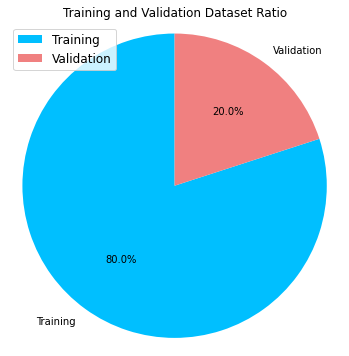

In [18]:
# 배치데이터 시각화
# Prepare data for the pie chart
labels = ["Training", "Validation"]
sizes = [TRAIN_IMG_COUNT, VAL_IMG_COUNT]
colors = ["deepskyblue", "lightcoral"]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Training and Validation Dataset Ratio")

# Customize pie chart appearance (optional)
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart
plt.legend(fontsize=12)  # Adjust legend font size if needed

# Display the pie chart
plt.show()

In [19]:
# 레이블 데이터 생성 함수
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

## Data Preprocessing 1 - Data resizing
- 이미지 리사이즈
- 이미지 픽셀 정규화 
- 데이터 타입 float 변경

In [20]:
# 이미지 형식 변경 함수
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일 경로로 이미지와 레이블 읽어오는 함수
def process_path(file_path):
    label = get_label(file_path) # 레이블 뽑기
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

---

[참고]
- 이미지 인코딩, 디코딩 [블로그](https://nanunzoey.tistory.com/entry/%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9D%B8%EC%BD%94%EB%94%A9-%EB%94%94%EC%BD%94%EB%94%A9)

---

In [21]:
# train, validation dataset 만들기
# num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE 변수 이용
## AUTOTUNE : 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [22]:
# 이미지 리사이즈 결과, 레이블 확인
for image, label in train_ds.take(1): # 하나의 데이터만 가져온다
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  False


In [23]:
# test dataset 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print("test dataset:", TEST_IMAGE_COUNT)

test dataset: 624


## ❇️ Data Preprocessing 2 - Data augmentation

`tf.image`
> - It provides functions for common image processing tasks like resizing, color space conversion, adjustments to properties like brightness/contrast, working with bounding boxes, cropping, flipping/rotating, and decoding/encoding image formats. 
> - Functions operate on either individual images (3D tensors) or batches of images (4D tensors). 
> - Images are represented as float or uint8 tensors, with values typically expected to be in the range 0-1 or 0-255.
> - It includes classes like ResizeMethod for different resizing algorithms, and functions organized into categories like processing, bounding boxes, decoding etc. 
> - The tf.image module provides these capabilities as an alternative to lower-leve<br>
[출처:[tensorflow doc](https://www.tensorflow.org/api_docs/python/tf/image), Anthropic 요약]

**[flip : 좌우반전]**
- tf.image.random_flip_left_right()

**[contrast 조정]**
- tf.image.random_contrast()

**[밝기 조정]**
- tf.image.random_brightness()

**[image scaling]**
- tf.image.per_image_standardization() : Linearly scales each image in image to have mean 0 and variance 1
- [참고문서](https://www.tensorflow.org/api_docs/python/tf/image/per_image_standardization)

In [24]:
# Final augmentation function
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
    # adjust contrast
    img = tf.image.random_contrast(img, 0.2, 0.5)
    # adjust brightness
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.per_image_standardization(img)
    
    return img,label

## tf.data pipeline setting

In [25]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    # data augmentation including normalization
    ds = ds.map(augment, num_parallel_calls=AUTOTUNE)
    
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)  # 32
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## 데이터 시각화
- 첫번째 배치를 추출해서 image, label 데이터 셋으로 구분후 이미지 확인

In [26]:
# 이미지 배치를 입력해서 여러장의 이미지 확인
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

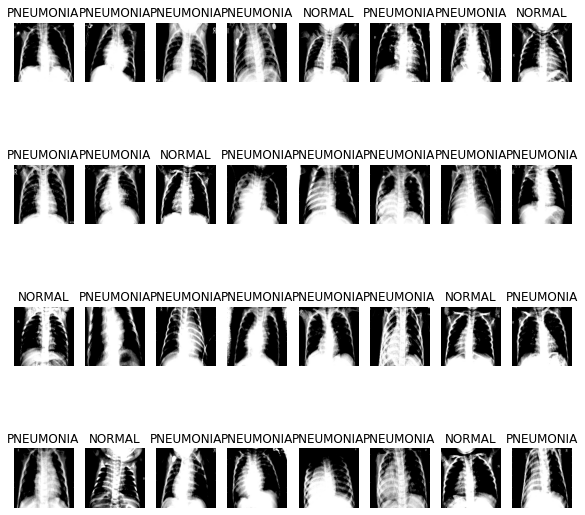

In [27]:
# 배치별로 이미지 확인
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

- 원본 이미지보다 constrast가 훨씬 강한 이미지가 만들어졌는데, 어떤 결과가 나올지 궁금하다 
- 의료영상 결과 분석 방법을 찾다가 논문 - [딥러닝 기반 의료영상 분석을 위한 데이터 증강 기법](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9431833/)을 발견했는데, 아래 레즈넷에서는 여기에서 소개하는 증강기법도 사용해봐야겠다.

## CNN modeling
👉 data augmentation이 성능에 어떤 영향이 있을지 확인

- CNN 구조에서 `feature extraction`, `classification`부분을 **block**으로 나눠서 모델을 만든다

### Convolution block

---
**SeperableConv2D layer**
- SeparableConv2D는 Depthwise Convolution과 Pointwise Convolution을 결합한 구조
    - Depthwise Convolution : 각 입력 채널에 대해 별도의 필터를 적용 
    - Pointwise Convolution : 각 출력 채널에 대해 하나의 필터를 적용 <br>
    
👉 *Conv2D는 일반적인 컨볼루션 필터를 사용하지만, SeperableConv2D는 위 두 convonlution을 분리해서 사용*

**SeparableConv2D vs Conv2D** 
- 모델 크기 : SeparableConv2D < Conv2D
- 학습 속도 : SeparableConv2D > Conv2D
- 성능 : SeparableConv2D $\approx$ Conv2D

👉 일반적으로 SeparableConv2D는 Conv2D보다 모델의 크기와 학습 속도를 줄이면서 유사한 성능을 얻을 수 있는 방법으로 사용된다고 한다 ~(근데 직접 해본 사람들은 또 큰 효과가 없다고도 하는데 일단 따라가본다)~<br>
[출처] Bard, [블로그](https://ejleep1.tistory.com/1204)

In [28]:
# convolution block
'''
- convolution 2번 
    - activation : relu
    - same padding
    - kernel size : 3x3
- batch normalization
- max pooling 
    - pool size : 2x2
'''
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

### Dense block

In [29]:
# dense block
'''
activation : relu
batch normalization
dropout
'''
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

---
#### [참고자료] Batch Normalization 과 Dropout을 같이 사용하는거 성능과 어떤 관련이 있을까?
- 별로다 논문 :[Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)
- 괜찮다 논문 : [Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks](https://arxiv.org/pdf/1905.05928.pdf)

🤓 퀘스트 끝나고 찬찬히 읽어보자

---

In [30]:
# build model = convolution block + dense block 합치기
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## Data Preprocessing 3 - data imbalance

`Weight balancing`
- training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여
- Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight 에 이러한 클래스별 가중치를 세팅할 수 있도록 지원

- `weight_for_0` : 'Normal' 이미지에 사용할 weight
- `weight_for_1` : 'Pneumonia' 이미지에 사용할 weight
    - 위 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정

**[참고자료][딥러닝에서 클래스 불균형을 다루는 방법](https://3months.tistory.com/414)**

In [31]:
# weight balancing
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


## Model training - CNN
- gpu를 사용해서 모델 훈련

In [40]:
# gpu로 모델 빌드, 컴파일
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [41]:
# gpu로 모델학습
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight)

Epoch 1/30
130/130 [==============================] - 68s 443ms/step - loss: 0.2858 - accuracy: 0.8721 - precision: 0.9727 - recall: 0.8520 - val_loss: 0.6942 - val_accuracy: 0.7334 - val_precision: 0.7334 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 57s 441ms/step - loss: 0.1813 - accuracy: 0.9397 - precision: 0.9801 - recall: 0.9381 - val_loss: 0.9765 - val_accuracy: 0.7344 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 57s 439ms/step - loss: 0.1498 - accuracy: 0.9428 - precision: 0.9788 - recall: 0.9433 - val_loss: 1.4621 - val_accuracy: 0.7314 - val_precision: 0.7314 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 58s 450ms/step - loss: 0.1437 - accuracy: 0.9469 - precision: 0.9838 - recall: 0.9441 - val_loss: 1.6119 - val_accuracy: 0.7314 - val_precision: 0.7314 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 59s 458ms/step - loss: 0.1367 - accura

## Visualize history

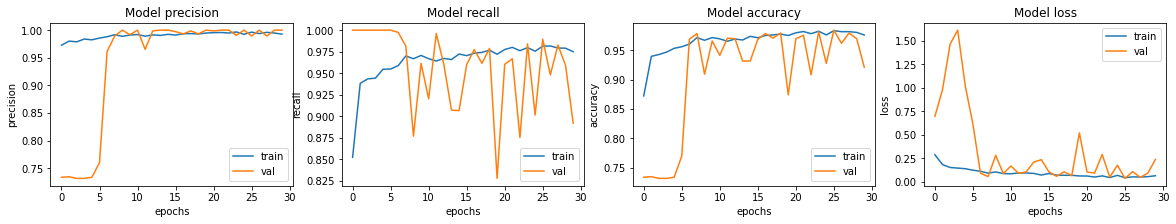

In [42]:
# visualize history
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

- 검증 데이터에 튀는 데이터가 많은 것 같지만 어쨌든 꽤 이상적인 그래프가 나온것 같다
- precision이 안정적으로 높은 값이 나오는 것에 비해 recall은 오락가락한데 f1 score로 정리된 값을 확인해봐야겠다

---
### ❇️ Precision / Recall / Accuracy
- 머신러닝을 처음 공부할때 분류성능평가지표를 공부한 후로 다시 들여다보지 않았는데, 이번 기회에 다시 복습

`precision 정밀도`
- 예측한 True 중에 실제 True의 비율

`recall 재현율`
- 실제 True 중에 True라고 예측한 비율

=> precison, recall 모두 실제 True 값과 예측 True 값에 관심이 있는데, 관점이 다른것<br>
- precision: 모델 기준
- recall: 정답 기준

`F1 score`
- precision, recall의 조화평균
- 데이터 label이 불균형 구조일때, 모델의 성능을 정확하게 평가할수 있음

👉 불균형한 데이터였기때문에 위 지표를 활용해서 F1 score로도 확인해보자

**[참고]** 
- [blog](https://sumniya.tistory.com/26)
- [blog](https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221531940245)

**[관련 공부자료]**
TensorFlow tutorials [Classification on imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)

---

## Evaluate model

In [43]:
# evaluate model
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

20/20 [==============================] - 7s 329ms/step - loss: 0.9970 - accuracy: 0.7163 - precision: 0.6898 - recall: 0.9923
Loss: 0.997005045413971,
Accuracy: 0.7163461446762085,
Precision: 0.6898396015167236,
Recall: 0.9923076629638672


- 정확도가 71% 정도이다. 검증 정확도는 97%가 나왔는데 이에 비하면 매우 낮다. 훈련데이터가 과적합 되었을수도 있을것 같다. 
- 재현율은 99%로 매우 높지만 precision은 68%정도로 낮다.  

---

### ❇️ F1 Score 확인
$$F1 Score=\frac{2}{\frac{1}{\Pr ecision}+\frac{1}{Recall}}$$

In [44]:
# F1 score
def f1_score(precision, recall):
    return 2.0 / (1/precision + 1/recall)

In [45]:
# check score
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1_score(precision, recall))

precision: 0.6898396015167236
recall: 0.9923076629638672
f1_score: 0.8138801367219817


- recall값이 상대적으로 매우 높아서 f1 score도 0.81이라는 값이 나온것 같다. 
- resnet18 모델은 어떤 결과가 나올지, 과적합 문제가 해결될지 확인해보자.

---

## 메모리 관리
- 메모리 관리를 위해 cnn 모델은 삭제후 resnet모델을 구현, 학습할 예정
- model.save() : 모델 정보 및 학습 가중치를 모두 저장
    - 추후에 불러오려면 `tf.keras.models.load_model()`
- history 저장 : pickle.dump
    - 추후에 불러오려면 `history = pickle.load(open('/trainHistoryDict', "rb"))`

In [46]:
# 모델 저장
model.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model/assets


In [47]:
# history 저장
import os
import pickle

# Specify the directory path
directory_path = '/aiffel/Quest/Main_quest_04'

# Ensure the directory exists, create it if not
os.makedirs(directory_path, exist_ok=True)

# Full file path
file_path = os.path.join(directory_path, 'train_history_dict.pkl')

# Assuming history.history is defined somewhere in your code
with open(file_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [50]:
# history 불러오기 테스트
loaded_history = pickle.load(open(file_path, "rb"))
print(history)

In [51]:
# 모델 삭제
del model

In [52]:
# history 삭제
del history

---
---
## ResNet18
**ResNet** 
- 2015년 ILSVRC 대회 (ImageNet Large Scale Visual Recognition Challenge)에서 엄청난 성능을 보여주었던 모델
- 특징
    - Residual Connection으로 학습된 정보가 데이터 처리과정에서 손실되는 것을 방지했다
    - ResNet의 Residual Connection은 이후에 나오는 Transformer와 같은 모델에도 사용되고 있다
    
**ResNet18**
- ResNet의 가장 작은 버전

**[작업순서]**
1. Residual block 구성
    - ResNet에서의 weight layer 구성
        1. 3x3 CNN
        2. BatchNormalization
        3. 활성화 함수 ReLU
        <img src = "residual_connection.max-800x600.png" width = "30%" height = "30%">
2. 아래 그림대로 ResNet 구현<br>
(참고사항 : 해당 table은 ImageNet Challenge를 가정했기 때문에 filter개수는 튜닝하면서 바꿔야함!)
<img src = "resnet-18.max-800x600.png" width = "30%" height = "30%">

👉 이 그림에서 자세한 정보를 읽어내는게 어려워서(stride 값은 어떻게 지정해야하는지, 위에서 만든 residual block이 어느 지점인건지, conv2_x 부분은 조금 다른데 이부분은 어떻게 구현해야하는지...) 관련 자료를 찾고 파악하느라 시간을 많이 썼다.
- 이 논문 [Resnet18 Model With Sequential Layer For Computing Accuracy On Image Classification Dataset
](https://ijcrt.org/papers/IJCRT2205235.pdf)에서 자세한 구조를 그려두었기 때문에 아래의 구조를 참고해서 구현

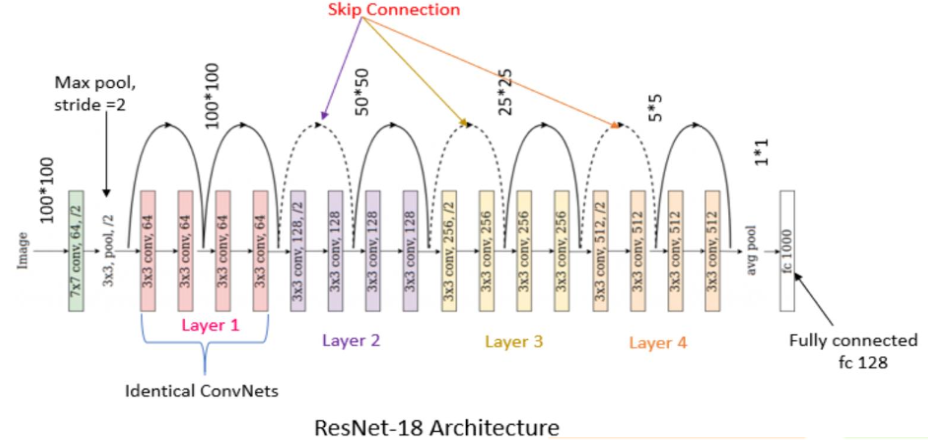

---
### Residual block 
<img src = "residual_connection.max-800x600.png" width = "30%" height = "30%">

1. 3x3 CNN<br>
    - [논문](https://arxiv.org/pdf/1512.03385.pdf)을 보면 skip connection으로 차원을 맞추는 작업을 할때 stride를 2로 지정한다고 한다.
    - 이 부분을 반영하도록 구조를 만든다
2. BatchNormalization<br>
3. 활성화 함수 ReLU<br>

👉 `residual block`이 `conv{n}_x` 부분인데, conv2_x 의 첫번째 부분만 skip connection을 제외하도록 구현한다

[참고]
- [kaggle notebook](https://www.kaggle.com/code/songrise/implementing-resnet-18-using-keras)
    - 위 노트북을 참고해서 class 디자인
- [blog](https://medium.com/analytics-vidhya/resnet-understand-and-implement-from-scratch-d0eb9725e0db)

[참고]
- activation function을 `tf.nn.relu`이렇게 호출하기도 한다! [링크](https://www.tensorflow.org/api_docs/python/tf/nn/relu)

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SeparableConv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Layer, Add
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
'''
n_filter : 각 layer에서 전달
stride : 
    - 기본적으로 1을 사용하고, 
    - `down_sample`이라는 변수를 설정해서 2를 사용하도록 만듬 => skip connection 부분
kernel_size : 3
weight initializer : He initializer

'''
class ResidualBlock(Model):
    def __init__(self, n_filter: int, down_sample=False):
        super().__init__()
        
        # 여기 안에서만 사용하는 변수라서 변수명 앞에 '__'붙임
        self.__n_filter = n_filter
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]  # down_sample일 경우에, 첫번째 stride=2 
        
        KERNEL_SIZE = (3,3)
        
        # use He initialization
        INITIALIZER = "he_normal"
        
        self.conv_1 = SeparableConv2D(self.__n_filter, strides=self.__strides[0],
                           kernel_size=KERNEL_SIZE, padding='same', 
                                      kernel_initializer=INITIALIZER)
        self.bn_1 = BatchNormalization()
        self.conv_2 = SeparableConv2D(self.__n_filter, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", 
                                      kernel_initializer=INITIALIZER)
        self.bn_2 = BatchNormalization()
        self.merge = Add()
        
        if self.__down_sample:
            # perform down sampling using stride of 2, 1x1 convolution
            self.res_conv = SeparableConv2D(
                self.__n_filter, strides=2, kernel_size=(1, 1), 
                kernel_initializer=INITIALIZER, padding="same")
            self.res_bn = BatchNormalization()
        
    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        
        return out

### ResNet
<img src = "resnet-18.max-800x600.png" width = "30%" height = "30%">

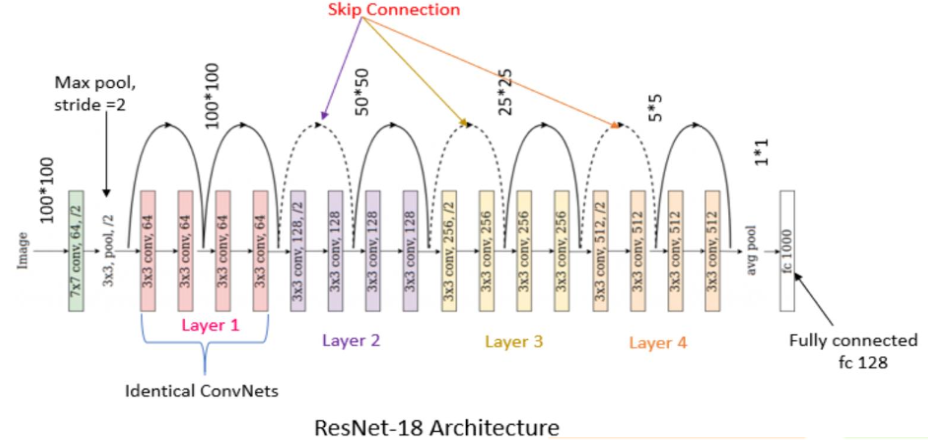

In [55]:
# ResNet18 구현
'''
num_classes : 분류해야하는 클래스 수
'''
class ResNet18(Model):
    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
            
        # conv1레이어는 직접 만들고
        self.conv_1 = SeparableConv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResidualBlock(64)
        self.res_1_2 = ResidualBlock(64)
        self.res_2_1 = ResidualBlock(128, down_sample=True) # 논문을 보면 여기에서 stride를 2, 1x1 convolution layer를 사용한다
        self.res_2_2 = ResidualBlock(128)
        self.res_3_1 = ResidualBlock(256, down_sample=True)
        self.res_3_2 = ResidualBlock(256)
        self.res_4_1 = ResidualBlock(512, down_sample=True)
        self.res_4_2 = ResidualBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        # 위에서 만든 residual block을 차례로 받기
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, 
                          self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        
        return out

In [59]:
# 모델 생성
with tf.device('/GPU:0'):
    # 분류할 클래스는 2개 이지만 레이블이 1개이므로 1
    model = ResNet18(1)
    model.build(input_shape = (None,224,224,3))
    
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [60]:
model.summary()

Model: "res_net18_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_44 (Separab multiple                  403       
_________________________________________________________________
batch_normalization_41 (Batc multiple                  256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling multiple                  0         
_________________________________________________________________
residual_block_8 (ResidualBl multiple                  9984      
_________________________________________________________________
residual_block_9 (ResidualBl multiple                  9984      
_________________________________________________________________
residual_block_10 (ResidualB multiple                  36480     
_________________________________________________________________
residual_block_11 (ResidualB multiple                  

In [61]:
# gpu로 모델학습
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/30
130/130 [==============================] - 68s 433ms/step - loss: 0.1964 - accuracy: 0.7450 - precision: 0.7450 - recall: 1.0000 - val_loss: 0.5899 - val_accuracy: 0.7305 - val_precision: 0.7305 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 56s 435ms/step - loss: 0.1116 - accuracy: 0.7440 - precision: 0.7440 - recall: 1.0000 - val_loss: 0.6783 - val_accuracy: 0.7344 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 57s 437ms/step - loss: 0.0917 - accuracy: 0.7440 - precision: 0.7440 - recall: 1.0000 - val_loss: 1.4891 - val_accuracy: 0.7354 - val_precision: 0.7354 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 57s 442ms/step - loss: 0.0762 - accuracy: 0.7450 - precision: 0.7450 - recall: 1.0000 - val_loss: 0.9033 - val_accuracy: 0.7373 - val_precision: 0.7373 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 59s 455ms/step - loss: 0.0572 - accura

KeyboardInterrupt: 

- 초반 validation recall값이 1로 나오는게 데이터를 나눌때 제대로 섞여서 만들어진게 맞나 하는 의심이 든다
- 학습속도가 매우 느리다. 사실 학습이 거의 되지 않는것 같아서 에포크 20 지점에서 학습을 멈췄다.
    - 에포크를 30으로 설정했는데, 논문을 보니 100 정도로 설정한것 같다. 
- 모델을 수정해서 다시 훈련해보기로 결정

In [62]:
# 데이터 다시 분류
test_filenames = tf.io.gfile.glob(TEST_PATH)

# train 데이터와 validation 데이터를 모두 filenames에 담기
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나누기 - random seed 수정
train_size = math.floor(len(filenames)*0.8)
random.seed(42)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

train_count = len(train_filenames)
test_count = len(test_filenames)
val_count = len(val_filenames)

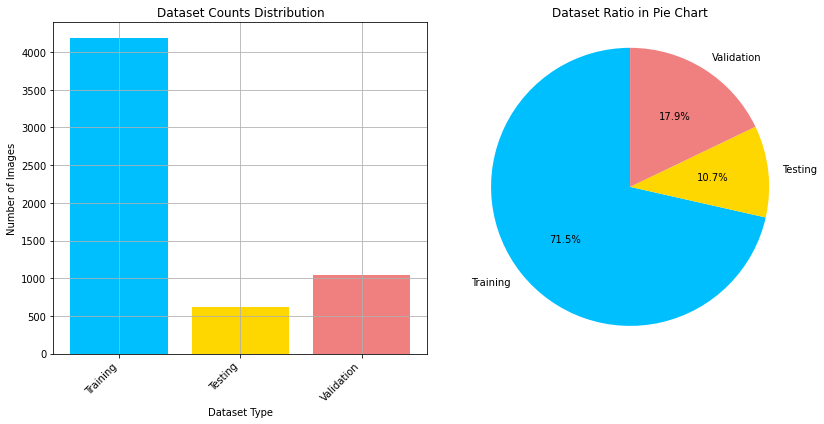

In [63]:
# 데이터수 그래프로 확인
# Prepare Data for Visualization
labels = ["Training", "Testing", "Validation"]
counts = [train_count, test_count, val_count]
colors = ["deepskyblue", "gold", "lightcoral"]

# Create the charts
plt.figure(figsize=(12, 6))  

# Bar Chart
plt.subplot(121)
plt.bar(labels, counts, color=colors)
plt.xlabel("Dataset Type")
plt.ylabel("Number of Images")
plt.title("Dataset Counts Distribution")
plt.grid(True)  # Add gridlines for visual reference
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Create the pie chart
plt.subplot(122)  # Position the pie chart in the second subplot
plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Dataset Ratio in Pie Chart")
plt.axis("equal")  # Ensure a circular pie chart

# Adjust layout for better visualization
plt.tight_layout()  # Prevent overlapping elements

# Display the combined chart
plt.show()

In [64]:
# tf.data instance 새로 생성
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [65]:
# train, validation dataset 만들기
# num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE 변수 이용
## AUTOTUNE : 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [66]:
# Final augmentation function 2 - delete adjusting contrast
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
    # adjust brightness
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.per_image_standardization(img)
    
    return img,label

In [67]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [68]:
# test dataset 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

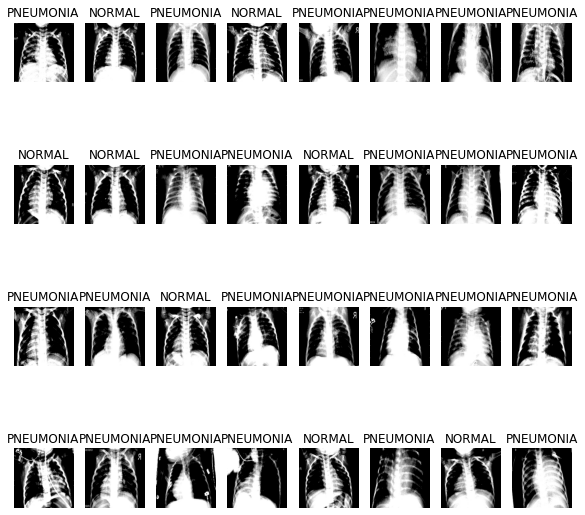

In [69]:
# 배치별로 이미지 확인
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

---

## ❇️ Hyperparameter optimization : Baysian Optimization
하이퍼파라미터를 찾기위해 지난번에 포기했던 `Baysian Optimization`을 시도해본다.<br>


[참고]
- [승순님 MainQuest3 노트북](https://github.com/Kimgabe/AIFFEL_Online_Quest/blob/main/MainQuest3(%EB%B0%91%EC%8B%9C%EB%94%A5_Final)/%5BMain_Quest03_%EC%9E%AC%EB%8F%84%EC%A0%84_%EC%A0%95%ED%99%95%EB%8F%84_99.7%25%5D_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0_%EB%A7%8C%EB%93%A4%EA%B3%A0_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb)
- [T_04. Bayesian Optimization for Neural Architecture Search](https://wikidocs.net/195717)
- [[비전공자용] [Python] 하이퍼파라미터 최적화 Hyperparameter Optimization](https://huangdi.tistory.com/11)

In [73]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

In [72]:
# import sys
# !{sys.executable} -m pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.9 MB/s            


In [93]:
# 하이퍼파라미터용 ResNet18 수정
'''
num_classes : 분류해야하는 클래스 수
'''
class ResNet18_for_param(Model):
    def __init__(self, num_classes, num_filters, **kwargs):
        super().__init__(**kwargs)
            
        # conv1레이어는 직접 만들고
        self.conv_1 = SeparableConv2D(num_filters, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResidualBlock(num_filters)
        self.res_1_2 = ResidualBlock(num_filters)
        self.res_2_1 = ResidualBlock(num_filters*2, down_sample=True) # 논문을 보면 여기에서 stride를 2, 1x1 convolution layer를 사용한다
        self.res_2_2 = ResidualBlock(num_filters*2)
        self.res_3_1 = ResidualBlock(num_filters*4, down_sample=True)
        self.res_3_2 = ResidualBlock(num_filters*4)
        self.res_4_1 = ResidualBlock(num_filters*8, down_sample=True)
        self.res_4_2 = ResidualBlock(num_filters*8)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        # 위에서 만든 residual block을 차례로 받기
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, 
                          self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        
        return out

In [94]:
# 모델 생성 함수 수정
with tf.device('/GPU:0'):
    def create_model(learning_rate, num_filters):
        # 분류할 클래스는 2개 이지만 레이블이 1개이므로 1
        model = ResNet18_for_param(1, num_filters)
        model.build(input_shape = (None,224,224,3))

        METRICS = [
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
        
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=METRICS
        )
        return model

    @use_named_args(dimensions=[Real(1e-6, 1e-2, "log-uniform", name='learning_rate'),
                               Integer(32, 128, name='num_filters')])
    def fitness(learning_rate, num_filters):
        model = create_model(learning_rate=learning_rate, num_filters=num_filters)

        score = model.evaluate(test_ds)
        accuracy = score[1]
        return -accuracy

### 최적화 수행

In [95]:
import time
from tensorflow import keras

# 검색 공간 정의
search_space = [Real(1e-6, 1e-2, "log-uniform", name='learning_rate'),
               Integer(32, 128, name='num_filters')]


# 최적화 시작 시간 측정
start_time = time.time()


# gp_minimize 함수로 베이지안 최적화 수행
gp_result = gp_minimize(func=fitness,
                        dimensions=search_space,
                        n_calls=12,
                        noise=0.01,
                        n_jobs=1,  # 병렬 처리 조정 가능(메모리 이슈 발생시)
                        kappa=5)

# 최적화 종료 시간 측정
end_time = time.time()

# 소요 시간 계산
elapsed_time = end_time - start_time
print(f"베이지안 최적화 소요 시간: {elapsed_time:.2f}초")

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - accuracy: 0.6267 - precision: 0.6267 - recall: 1.0000

KeyboardInterrupt: 

- 계속 같은 결과값이 나오는게 뭔가 잘못된것같다. 
- 안써본 방법을 적용하는거라 어느 지점이 잘못 되었는지 찾아내는게 쉽지 않다. 
- 이 방법은 이전에 만들었던 결과가 잘 나오는 cnn모델이나 다른 경우에 적용해서 확인해봐야겠다.

---
## ❇️ [중간점검]
- resnet18모델은 학습을 거의 하지 못했다.
- 이 문제를 해결하기 위해 하이퍼파라미터 최적화를 시도해보려고 했지만 역시 좋은 결과를 얻지 못했다.
- 문제가 있을수 있는 지점을 짚어보면,
    - 데이터셋 
        - data augmentation이 잘못 되었거나
        - 데이터셋 분류 작업 자체가 잘못 되었거나
        - weight balancing이 잘못 되엇거나
    - 모델
        - 지정한 필터수가 적절하지 않거나
        - batch normalization도 layer마다 수행하는데 가중치 초기화가 잘못 되었거나!
            - weight balacing한 결과를 class_weight로 지정했는데, 내가 설정해둔 `he initializer`가 문제일지도 모르겠다.
        - learning rate가 적절하지 않거나
        - loss function이 적절하지 않거나


**==> 일단 initializer를 설정해둔 부분을 수정하고, augmenation 부분도 조금 수정한 뒤에 다시 모델학습을 진행해본다**

---

## ❇️ Modified ResNet18
### Modified residual block - kernel initializer 삭제

In [96]:
# residualblock2 - kernel initializer 삭제
'''
n_filter : 각 layer에서 전달
stride : 
    - 기본적으로 1을 사용하고, 
    - `down_sample`이라는 변수를 설정해서 2를 사용하도록 만듬 => skip connection 부분
kernel_size : 3
'''
class ResidualBlock(Model):
    def __init__(self, n_filter: int, down_sample=False):
        super().__init__()
        
        # 여기 안에서만 사용하는 변수라서 변수명 앞에 '__'붙임
        self.__n_filter = n_filter
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]  # down_sample일 경우에, 첫번째 stride=2 
        
        KERNEL_SIZE = (3,3)
        
#         # use He initialization
#         INITIALIZER = "he_normal"
        
        self.conv_1 = SeparableConv2D(self.__n_filter, strides=self.__strides[0],
                           kernel_size=KERNEL_SIZE, padding='same')
        self.bn_1 = BatchNormalization()
        self.conv_2 = SeparableConv2D(self.__n_filter, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same")
        self.bn_2 = BatchNormalization()
        self.merge = Add()
        
        if self.__down_sample:
            # perform down sampling using stride of 2, 1x1 convolution
            self.res_conv = SeparableConv2D(
                self.__n_filter, strides=2, kernel_size=(1, 1), padding="same")
            self.res_bn = BatchNormalization()
        
    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        
        return out

### Modified ResNet - kernel initializer 삭제

In [97]:
# ResNet18 2 - kernel initializer 삭제
'''
num_classes : 분류해야하는 클래스 수
'''
class ResNet18(Model):
    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
            
        # conv1레이어는 직접 만들고
        self.conv_1 = SeparableConv2D(64, (7, 7), strides=2, padding="same")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResidualBlock(64)
        self.res_1_2 = ResidualBlock(64)
        self.res_2_1 = ResidualBlock(128, down_sample=True) # 논문을 보면 여기에서 stride를 2, 1x1 convolution layer를 사용한다
        self.res_2_2 = ResidualBlock(128)
        self.res_3_1 = ResidualBlock(256, down_sample=True)
        self.res_3_2 = ResidualBlock(256)
        self.res_4_1 = ResidualBlock(512, down_sample=True)
        self.res_4_2 = ResidualBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        # 위에서 만든 residual block을 차례로 받기
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, 
                          self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        
        return out

## ❇️ Data Preprocessing 4 - Data augmentation 수정
- tf.image.per_image_standardization 부분 제외
- 이미지에 패딩을 넣고 random crop 추가
    - tf.image.resize_with_crop_or_pad
    - tf.image.random_crop
    
[참고]
- [blog](https://lynnshin.tistory.com/27)
- [TensorFlow 공식문서 - tf.image](https://www.tensorflow.org/api_docs/python/tf/image/random_crop)

In [100]:
# augmentation function v2
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
    # adjust contrast
    img = tf.image.random_contrast(img, 0.2, 0.5)
    # adjust brightness
    img = tf.image.random_brightness(img, 0.2)
#     img = tf.image.per_image_standardization(img) # 혹시 이 부분을 추가해서 생긴 문제일지도 모르니 제외
    
    # add 3 pixels of padding
    img = tf.image.resize_with_crop_or_pad(img, IMAGE_SIZE[0]+3, IMAGE_SIZE[1]+3)
    # random crop back to the original size
    img = tf.image.random_crop(img, size=[IMAGE_SIZE[0],IMAGE_SIZE[1],3])
    
    return img,label

In [103]:
IMAGE_SIZE[0], IMAGE_SIZE[1]

(224, 224)

In [104]:
# train, validation dataset 만들기
# num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE 변수 이용
## AUTOTUNE : 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [106]:
# 이미지 리사이즈 결과, 레이블 확인
for image, label in train_ds.take(1): # 하나의 데이터만 가져온다
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  False


In [107]:
# test dataset 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print("test dataset:", TEST_IMAGE_COUNT)

test dataset: 624


## ❇️ *문제 지점 - tf.data pipline : augmentation 누락*
- 2.23 지점에서 확인

In [108]:
# tf.data 파이프라인설정 - 데이터 변환
'''
shuffle() : 고정 크기 버퍼를 유지, 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택
repeat() : epoch를 진행하면서 여러 번 데이터셋을 불러옴
    - 예: 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요
    - repeat()를 사용하면 자동으로 데이터를 맞춰줌
batch() : BATCH_SIZE에서 정한 만큼 배치로 만들어줌
    - 예: 100개의 데이터를 10개의 배치로 나누면 각 배치에는 10개의 데이터로 나뉨
prefetch() : 학습 데이터를 나눠서 읽어옴
    - 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비
    - 리소스의 유휴 상태를 줄일 수 있음
'''
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

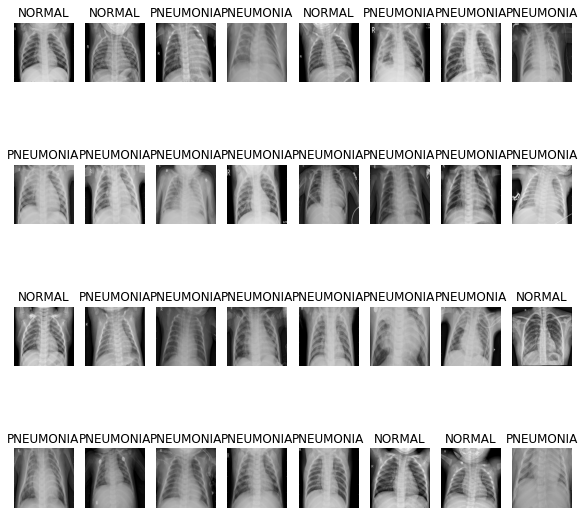

In [109]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

- 처음 augmentation했을때 폐의 흐릿함이 잘 보이지 않았는데, 이번엔 좀 다른 결과를 얻을수도 있을 것 같다!

In [110]:
# 모델 생성 2
with tf.device('/GPU:0'):
    # 분류할 클래스는 2개 이지만 레이블이 1개이므로 1
    model = ResNet18(1)
    model.build(input_shape = (None,224,224,3))
    
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [111]:
# gpu로 모델학습 2
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/30
130/130 [==============================] - 64s 415ms/step - loss: 0.2184 - accuracy: 0.7421 - precision: 0.7421 - recall: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.7461 - val_precision: 0.7461 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 54s 421ms/step - loss: 0.1151 - accuracy: 0.7433 - precision: 0.7433 - recall: 1.0000 - val_loss: 1.0867 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 55s 424ms/step - loss: 0.0806 - accuracy: 0.7382 - precision: 0.7382 - recall: 1.0000 - val_loss: 2.4672 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 54s 414ms/step - loss: 0.0685 - accuracy: 0.7442 - precision: 0.7442 - recall: 1.0000 - val_loss: 3.9407 - val_accuracy: 0.7432 - val_precision: 0.7432 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 56s 434ms/step - loss: 0.0624 - accura

- 여전히 정확도가 74%에서 늘지 않고 있다😭 어떻게 해결해야할까...?
    > 학습 곡선이 거의 수평인 경우 : 데이터 양이나 품질이 부족함<br>
    > 모델 가중치 값이 거의 변하지 않는다면 : 모델 설정이 잘못되었거나 학습률이 너무 낮음
- 어떤 경우인지 확인해본다

### 결과 시각화

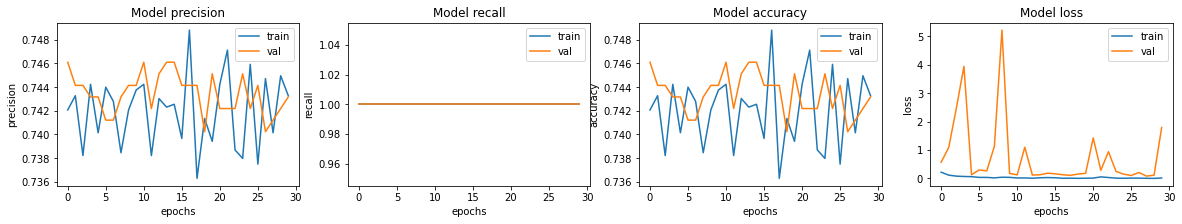

In [112]:
# visualize history
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

- 와 어떻게 이런 그래프가 나올수 있을까...? 뭔가가 단단히 잘못되엇다.

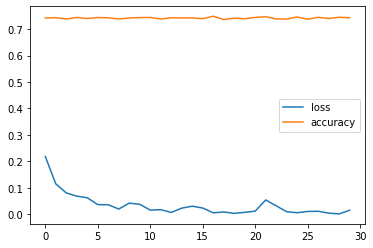

In [113]:
# 학습곡선 확인
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

- 가중치 값도 변하고 있는지 확인

### ❇️ 가중치 확인

In [114]:
# 모델 추론 모드
model.trainable = False

# 가중치 저장
weights = model.get_weights()

for weight in weights:
    print(weight)

[[[[-0.05913683]
   [-0.00306419]
   [-0.08254462]]

  [[ 0.15731347]
   [-0.03488492]
   [-0.17815123]]

  [[-0.09903473]
   [ 0.00974374]
   [ 0.05977437]]

  [[ 0.1262685 ]
   [ 0.16948892]
   [-0.21170138]]

  [[-0.04925136]
   [ 0.23711683]
   [-0.1666867 ]]

  [[ 0.23423459]
   [-0.00597413]
   [-0.17732431]]

  [[ 0.17497478]
   [ 0.17711958]
   [-0.05257416]]]


 [[[-0.07197431]
   [ 0.02562372]
   [-0.11163823]]

  [[-0.01344607]
   [-0.17210598]
   [-0.0741069 ]]

  [[-0.17958635]
   [-0.04217398]
   [-0.08824532]]

  [[-0.11675856]
   [-0.11774499]
   [-0.06748684]]

  [[ 0.0826335 ]
   [-0.0145709 ]
   [ 0.20295782]]

  [[ 0.00654555]
   [ 0.04897393]
   [-0.08812913]]

  [[ 0.15821376]
   [ 0.05072008]
   [-0.0590759 ]]]


 [[[ 0.14871313]
   [-0.17340115]
   [ 0.0120829 ]]

  [[ 0.03983961]
   [-0.17656443]
   [-0.1068211 ]]

  [[ 0.18521364]
   [-0.10562791]
   [ 0.16110007]]

  [[-0.15811263]
   [-0.14871599]
   [ 0.07091725]]

  [[-0.06005448]
   [-0.07490111]
   [ 0.0

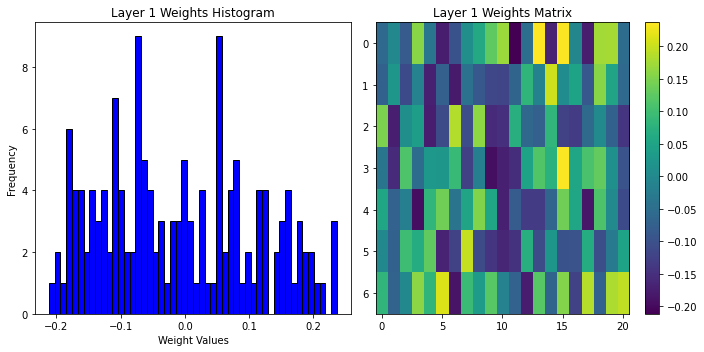

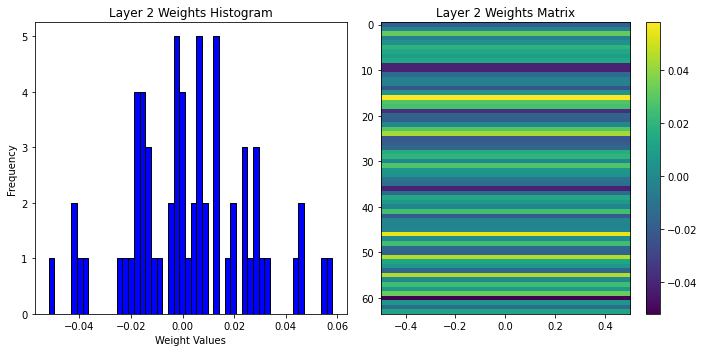

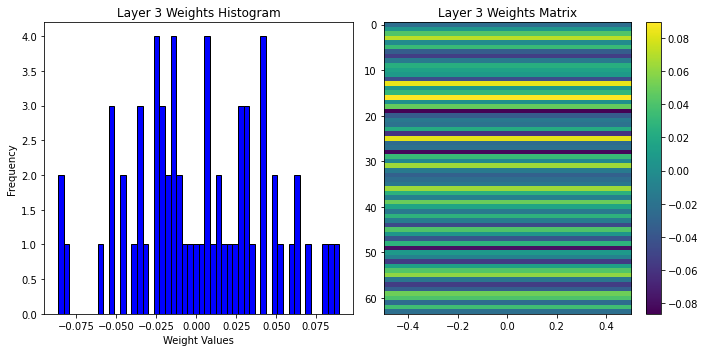

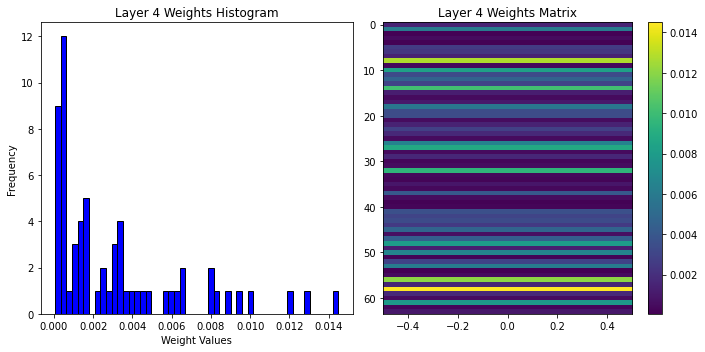

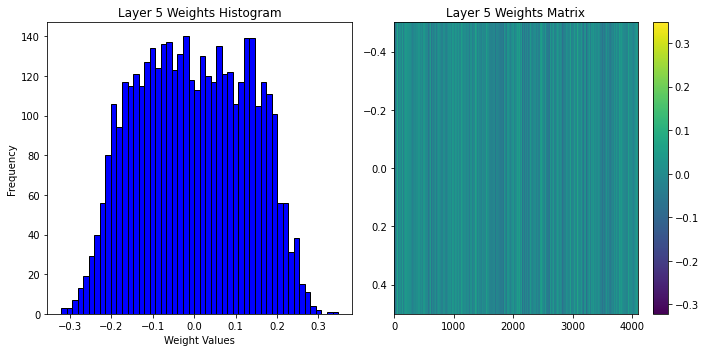

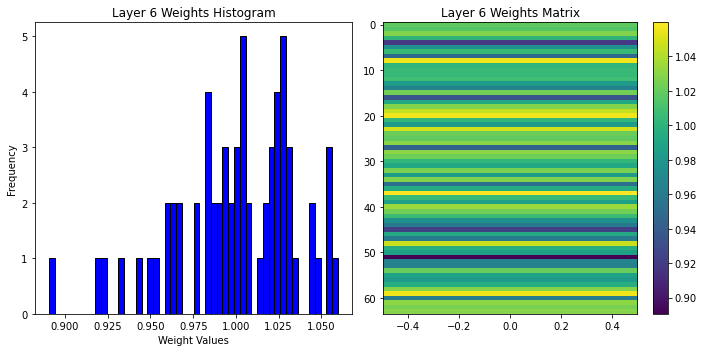

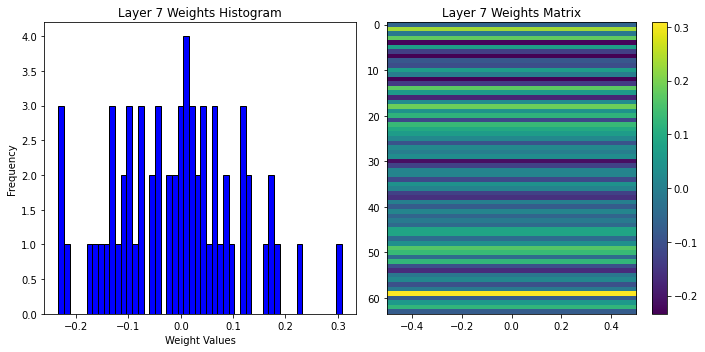

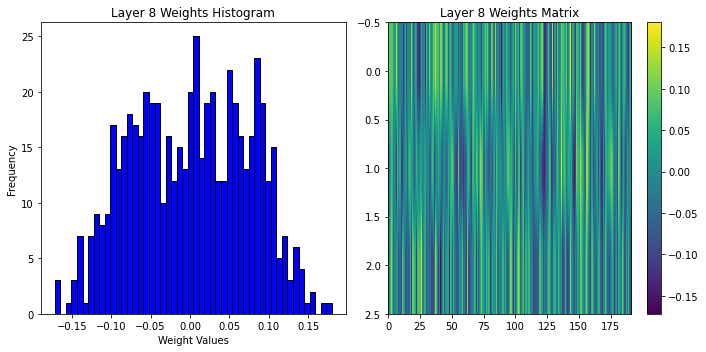

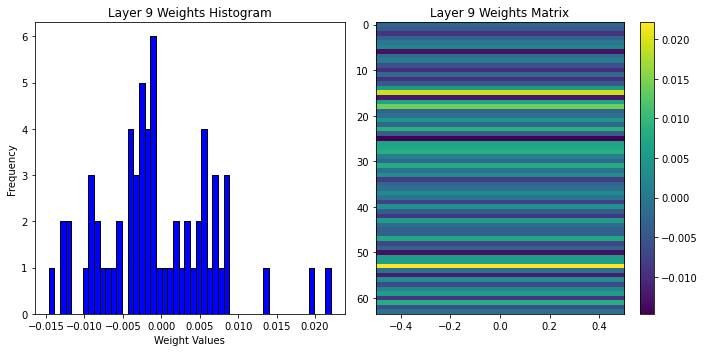

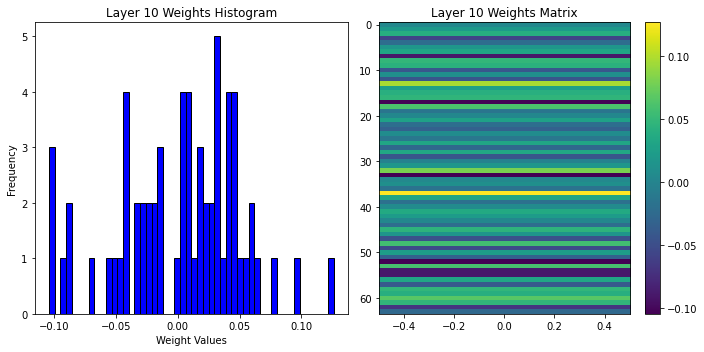

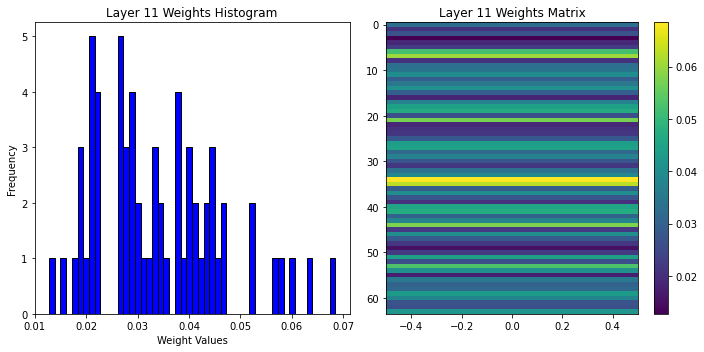

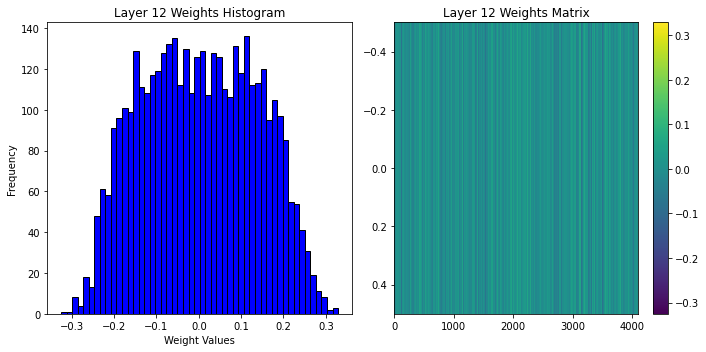

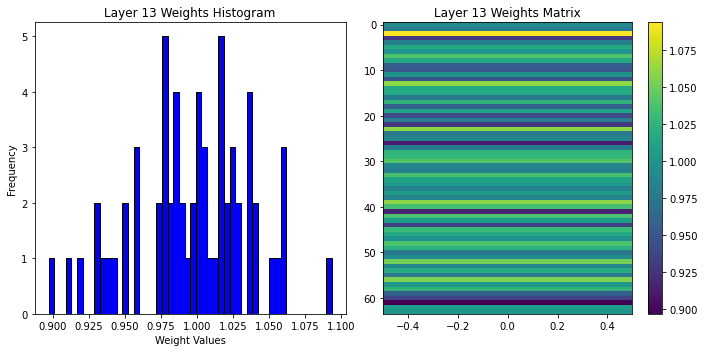

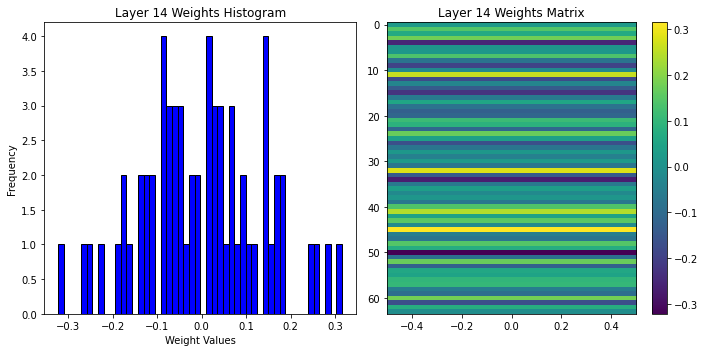

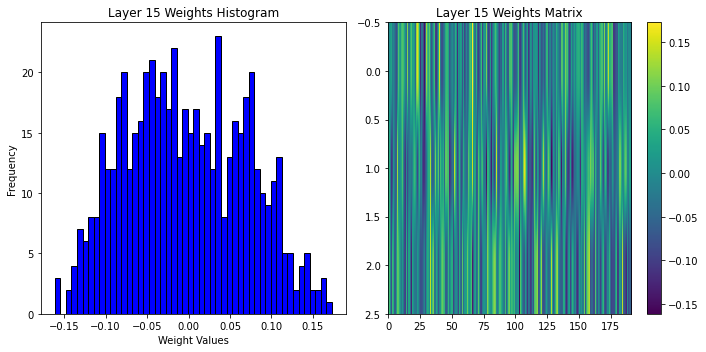

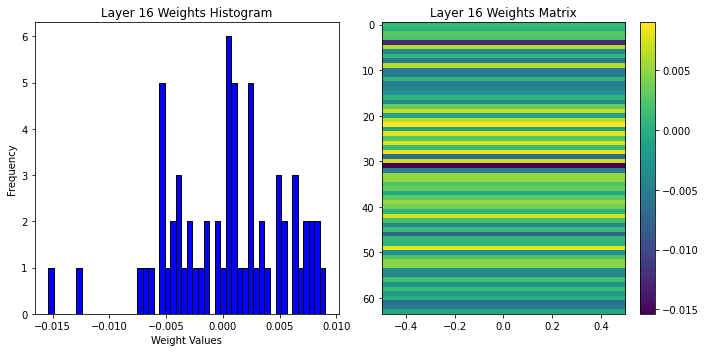

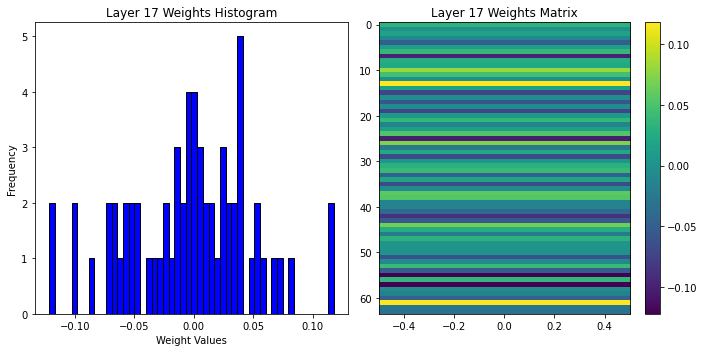

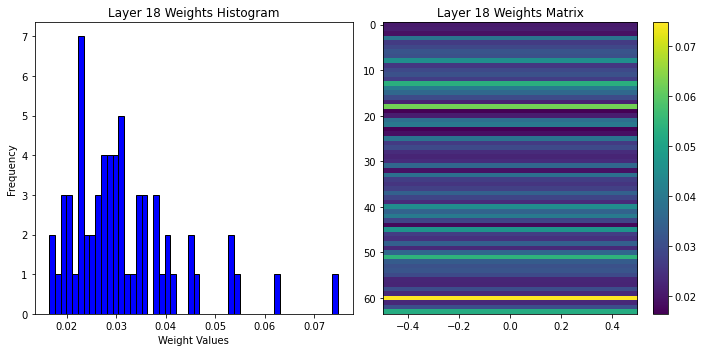

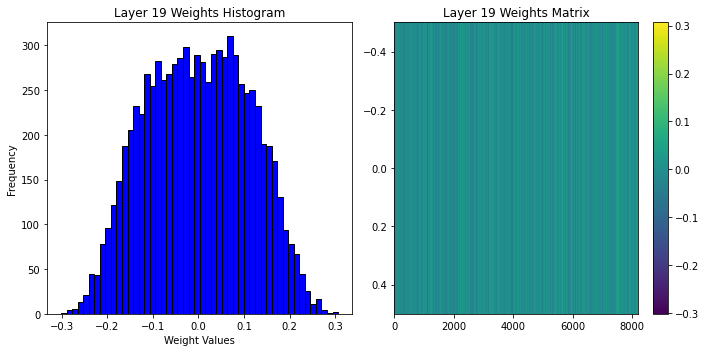

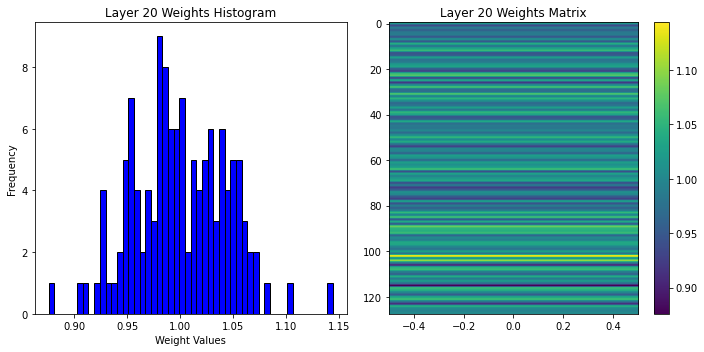

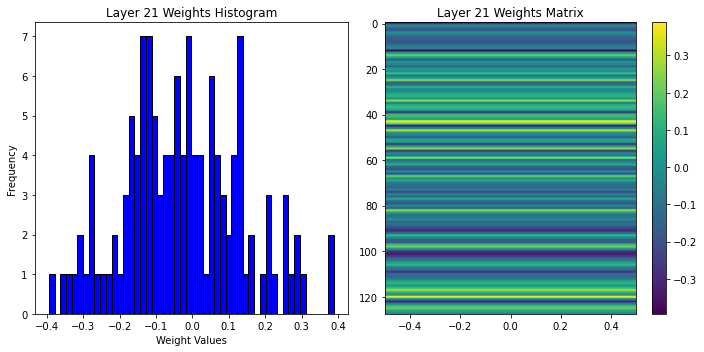

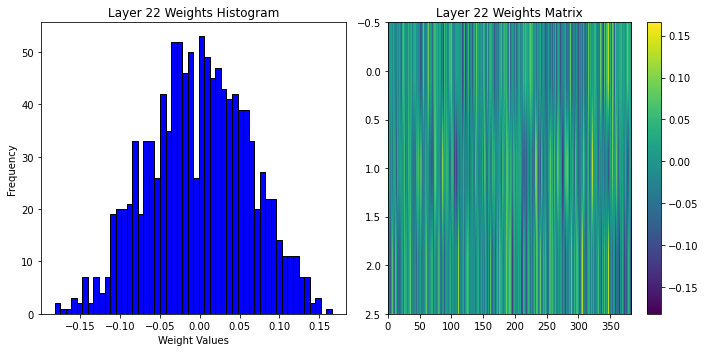

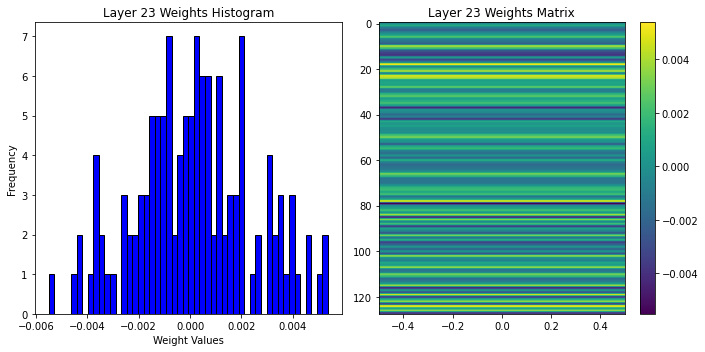

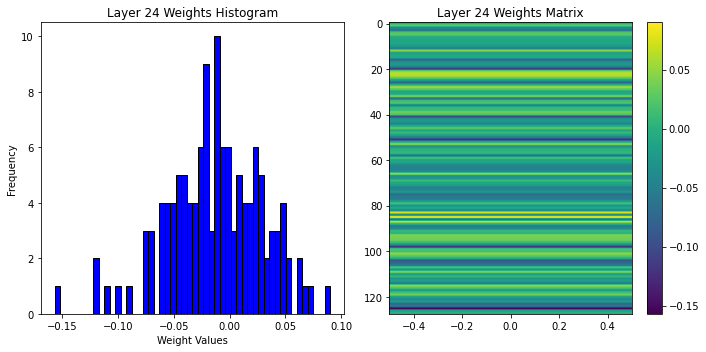

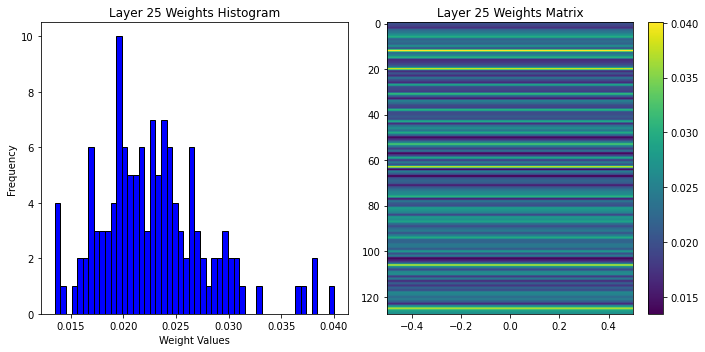

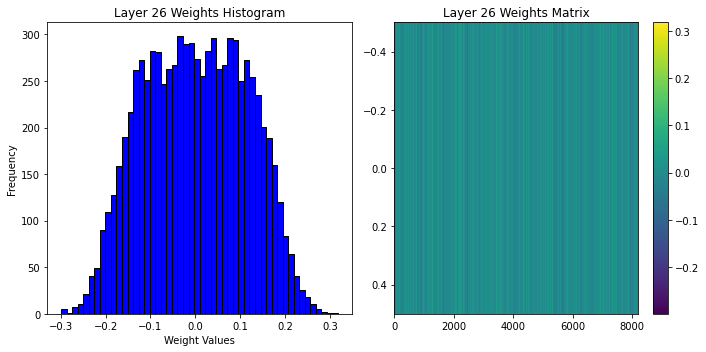

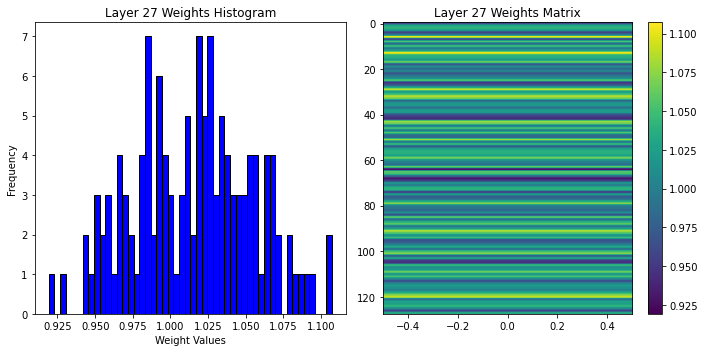

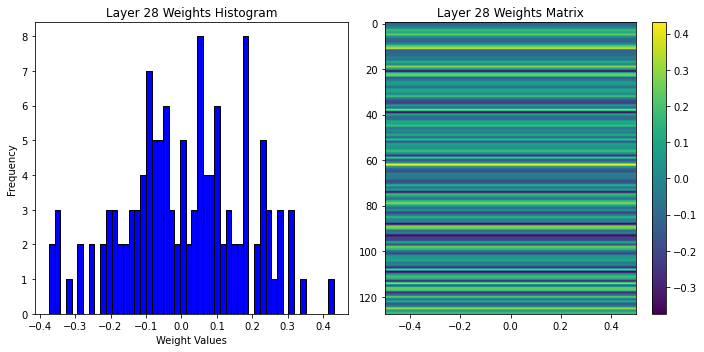

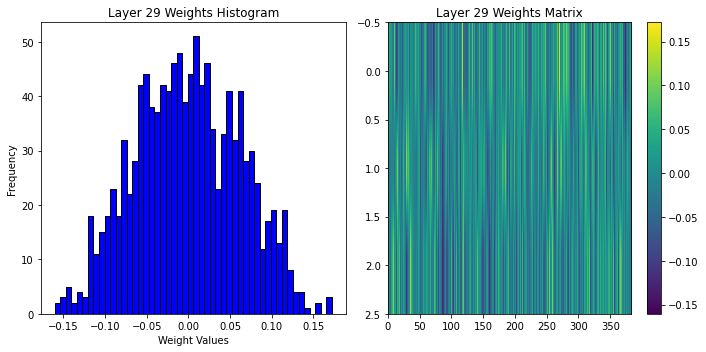

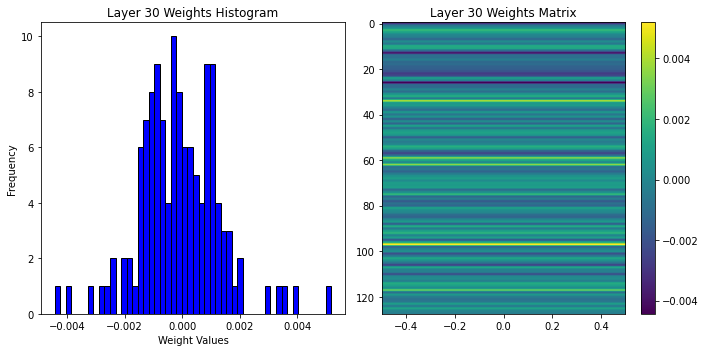

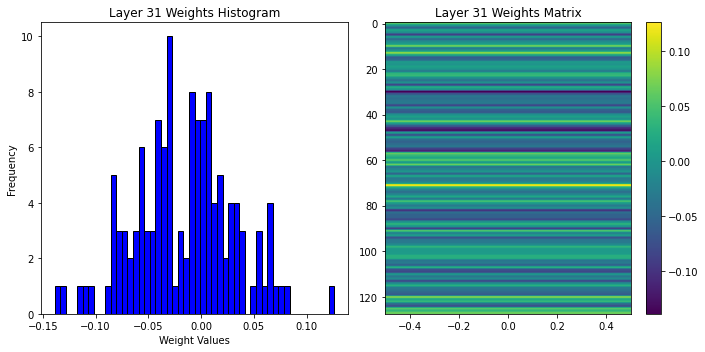

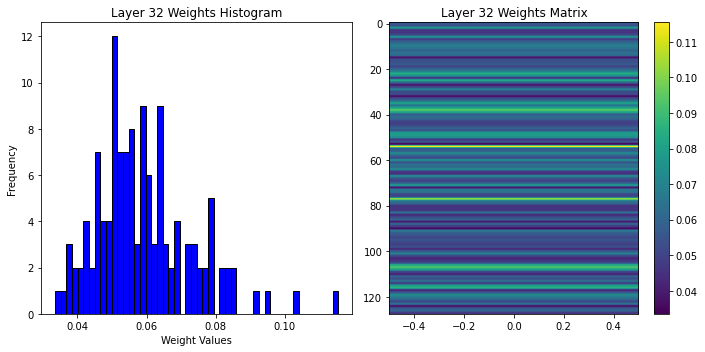

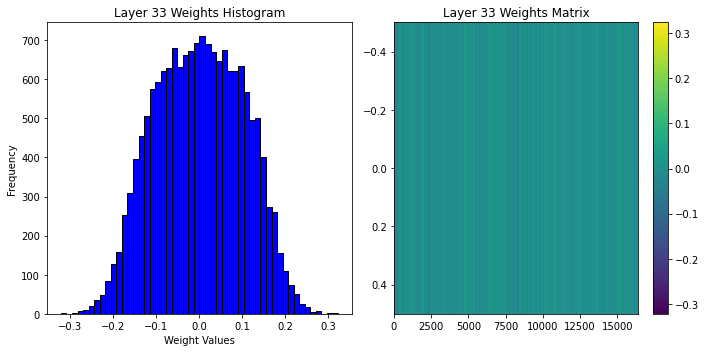

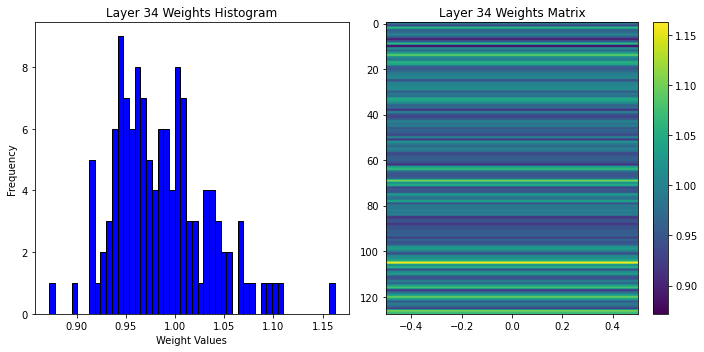

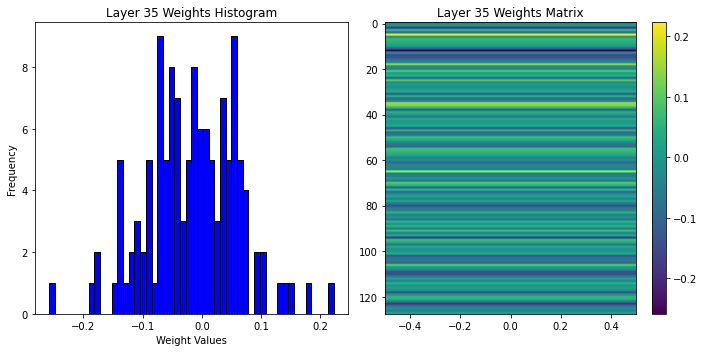

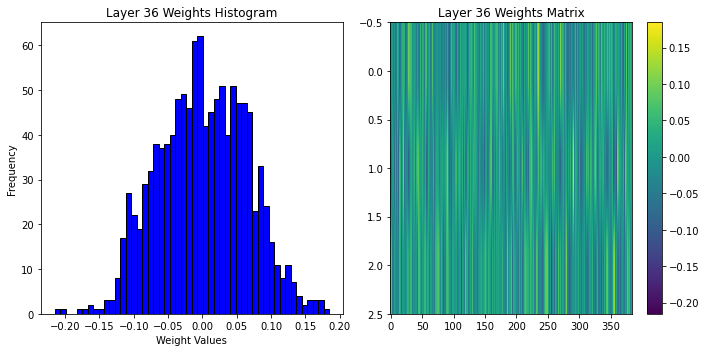

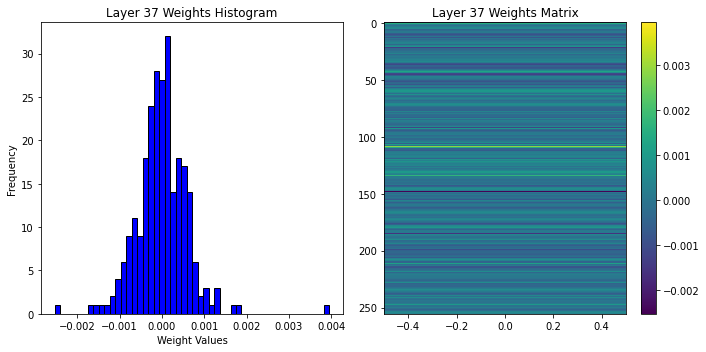

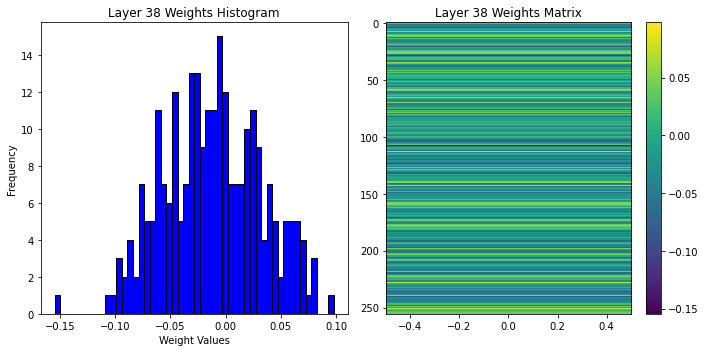

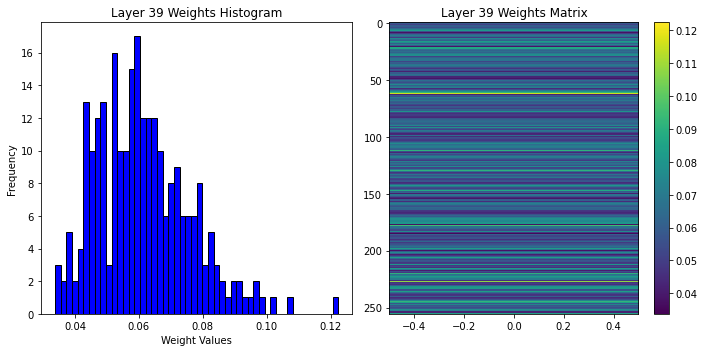

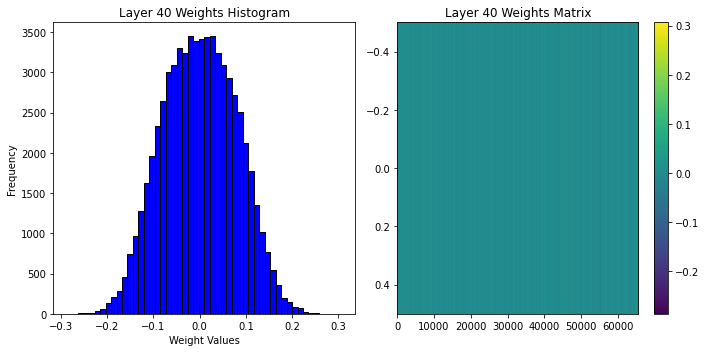

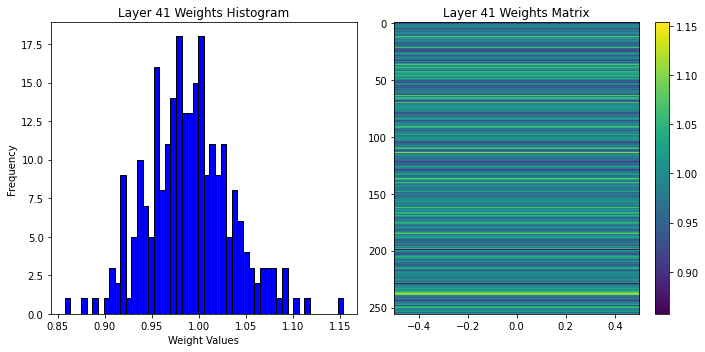

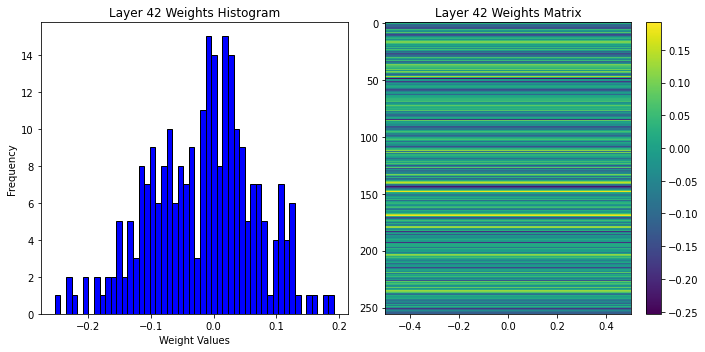

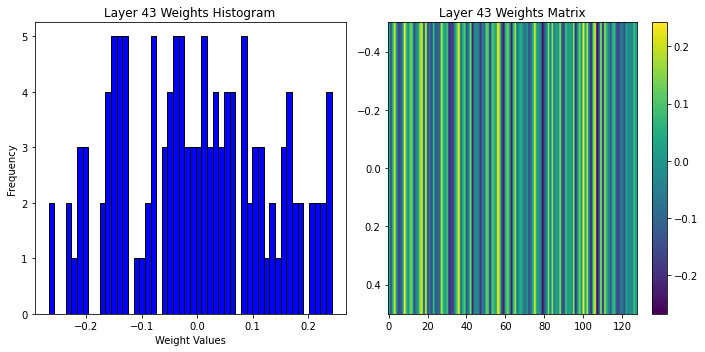

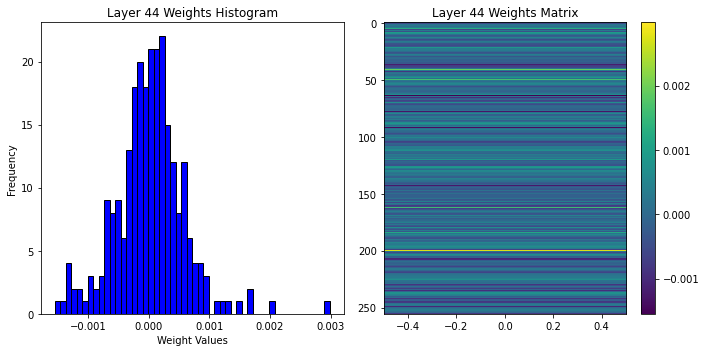

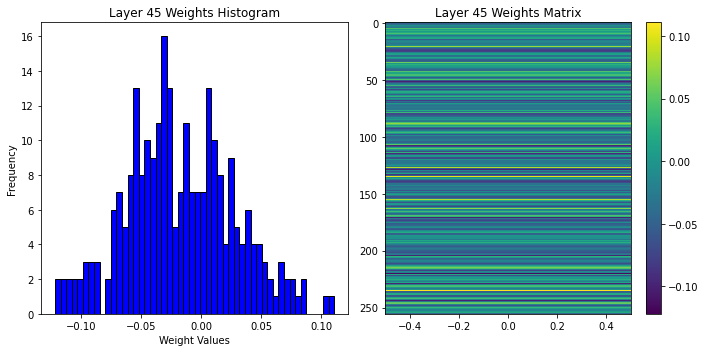

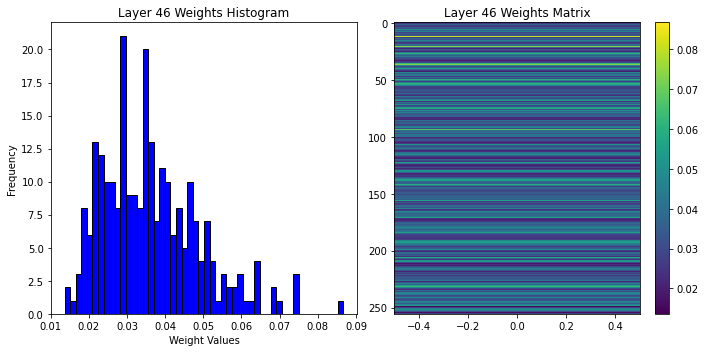

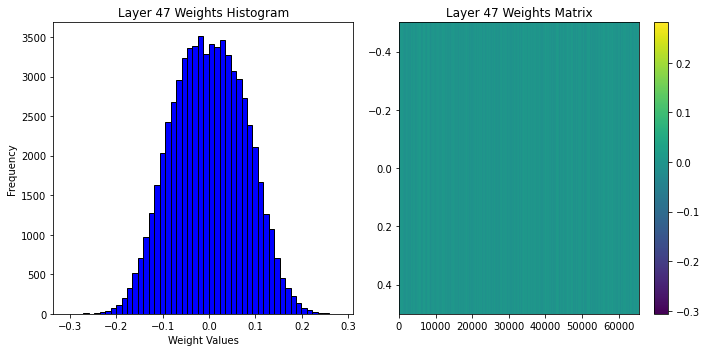

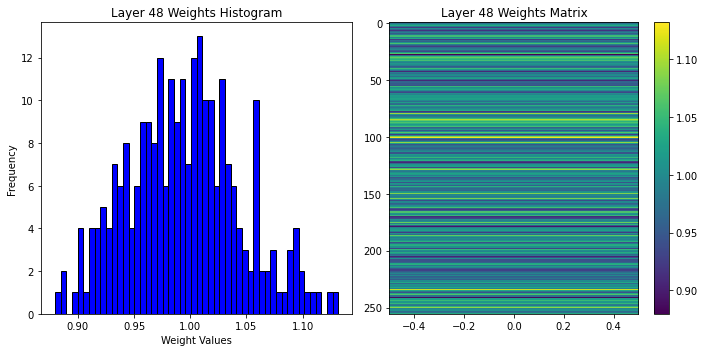

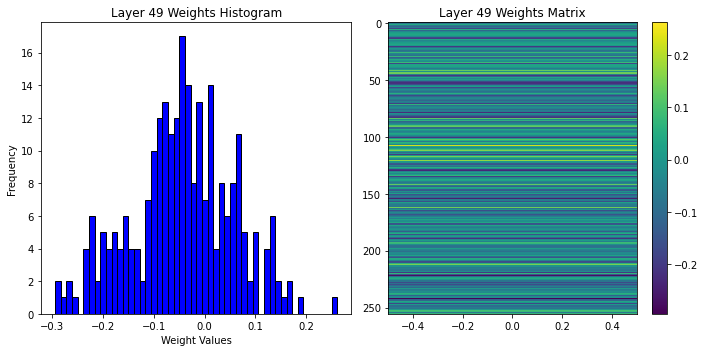

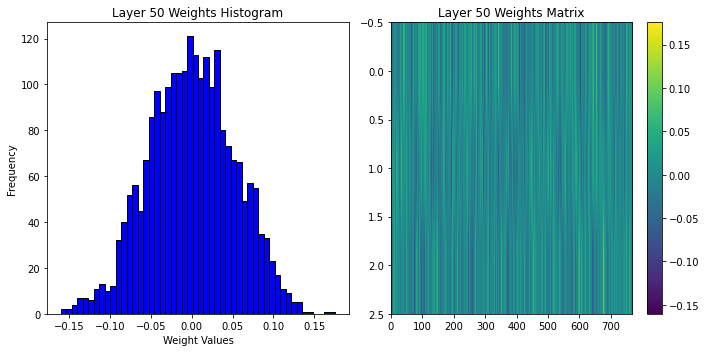

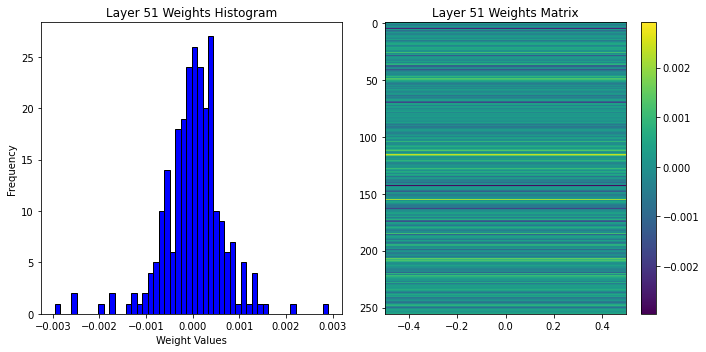

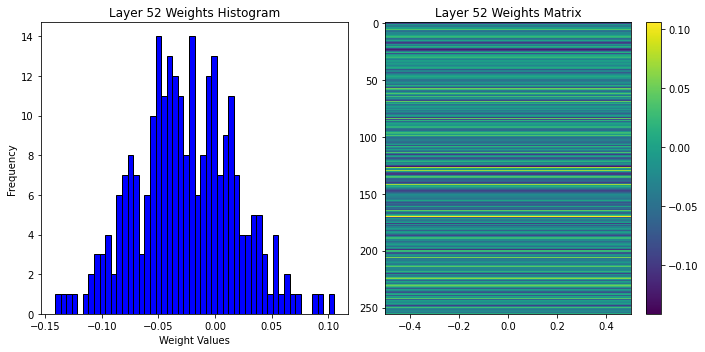

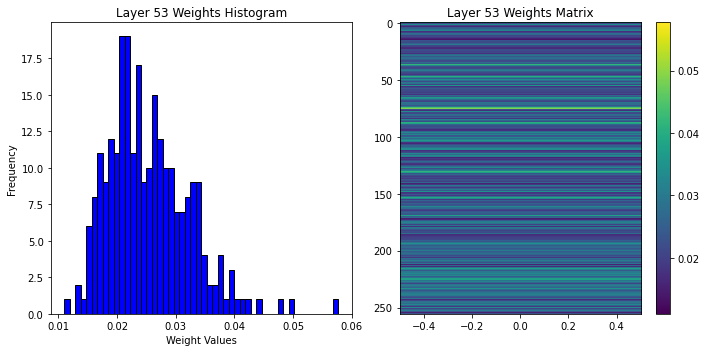

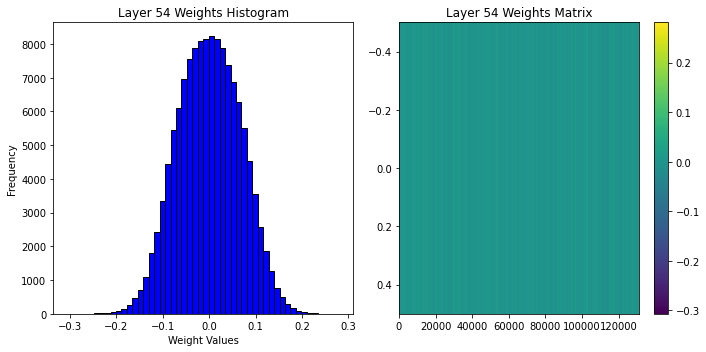

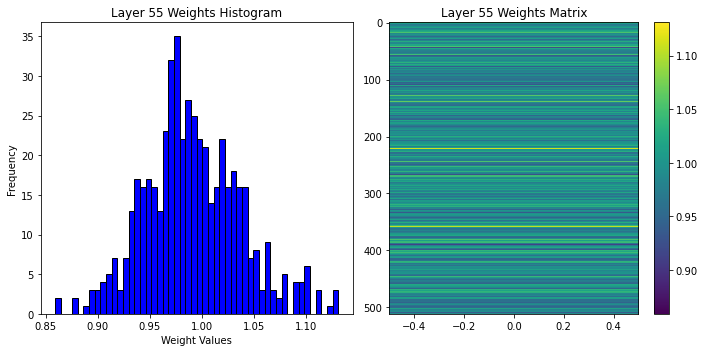

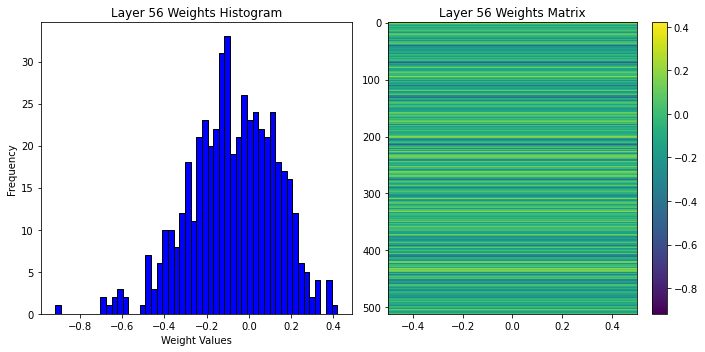

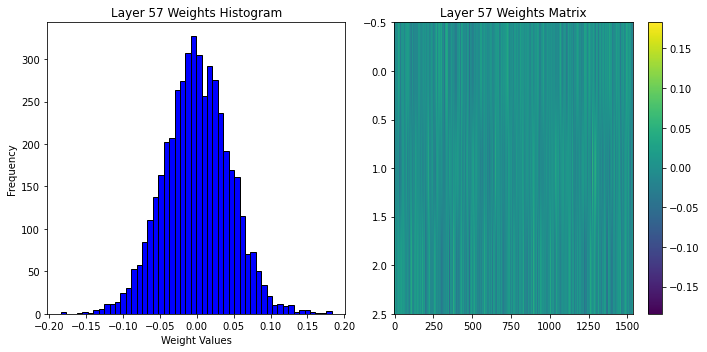

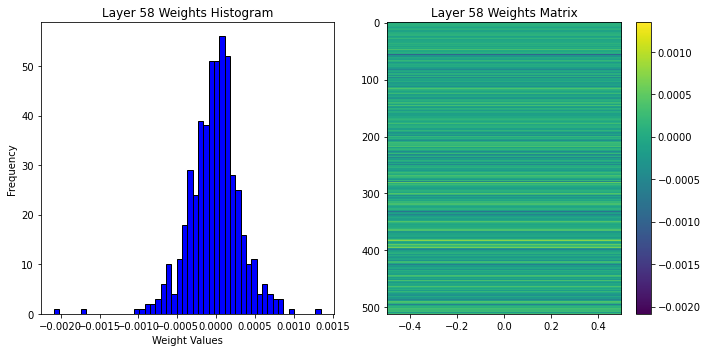

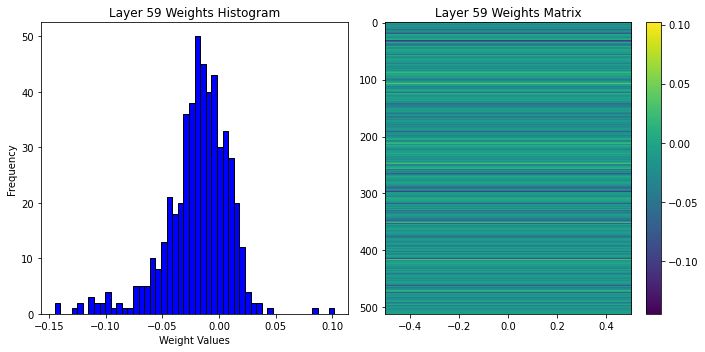

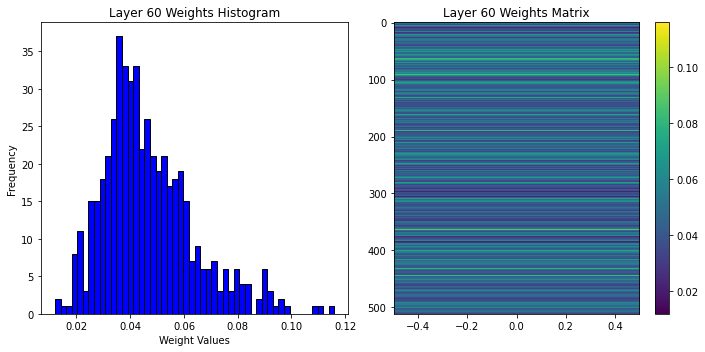

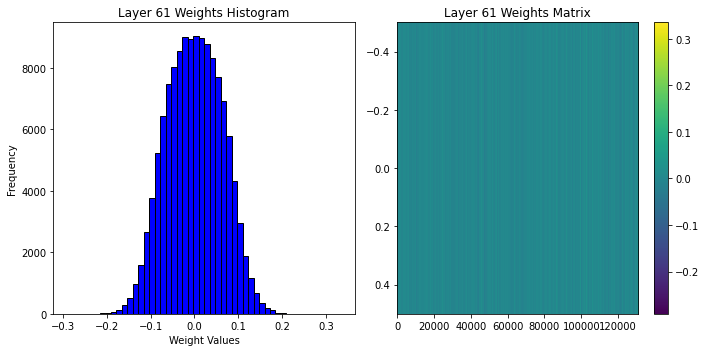

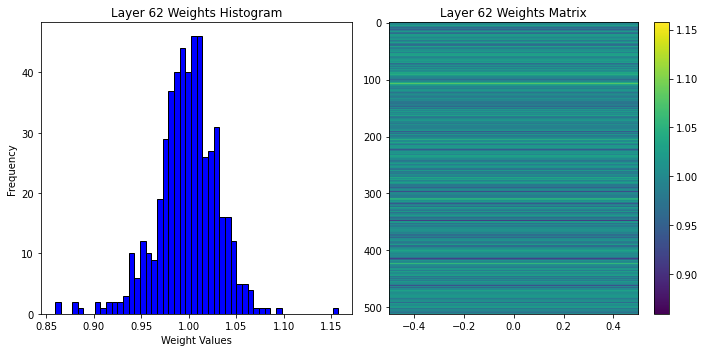

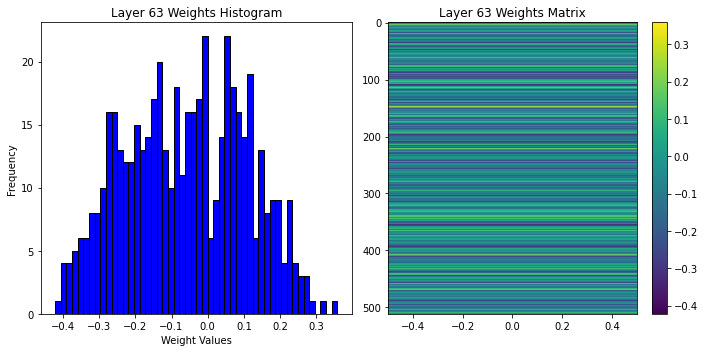

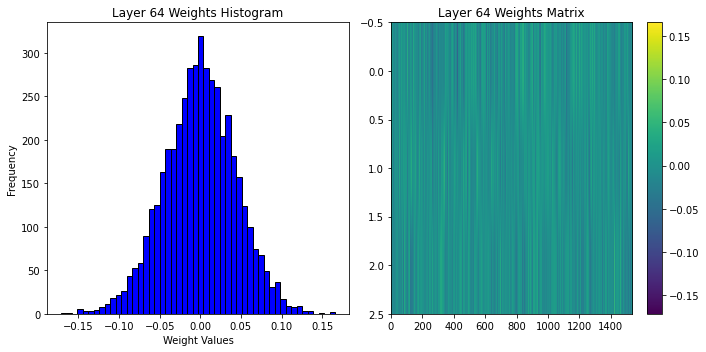

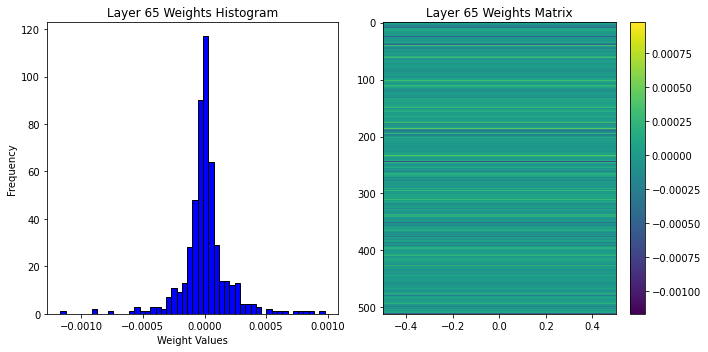

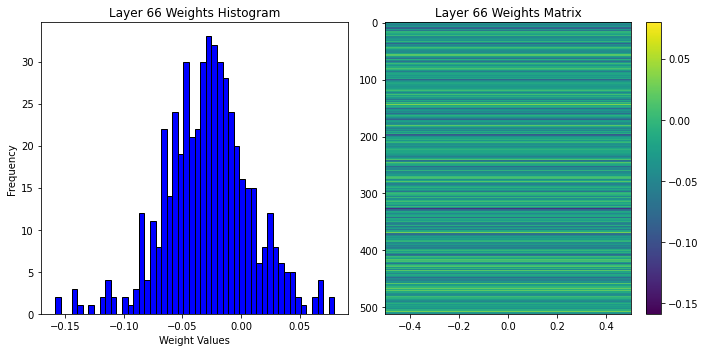

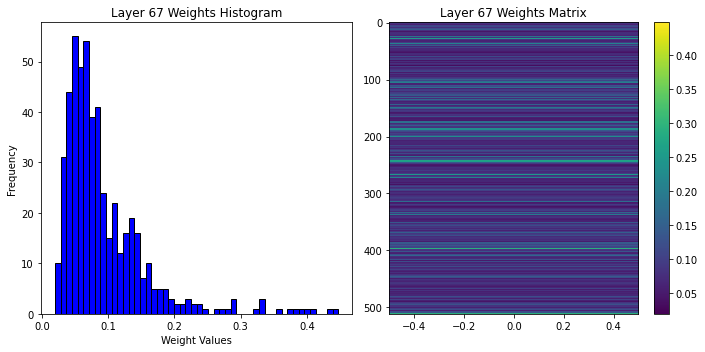

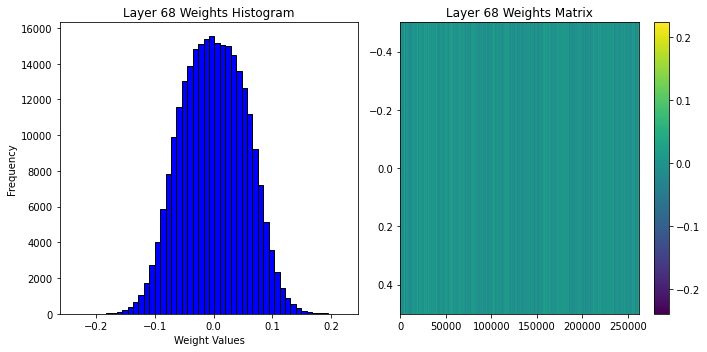

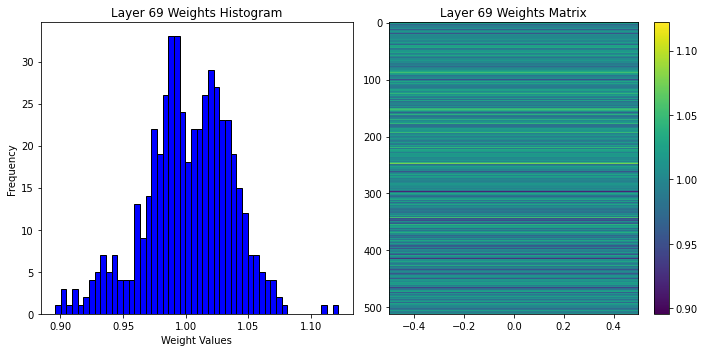

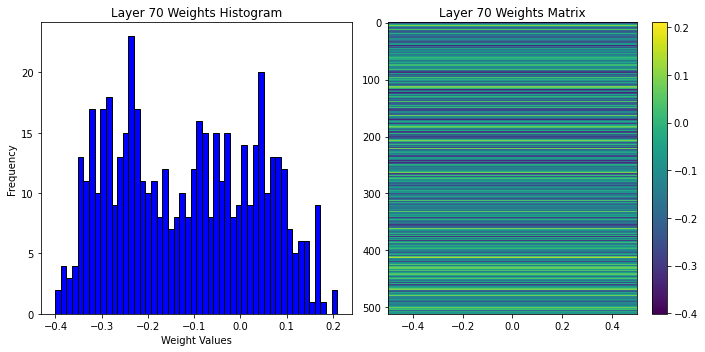

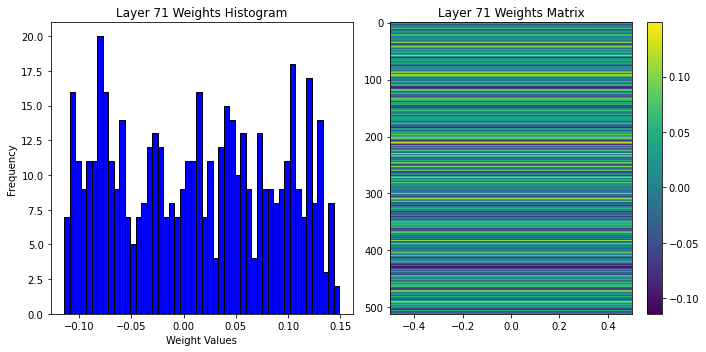

In [122]:
# 각 레이어의 가중치를 그래프로 시각화
for i in range(len(weights)//2):  # len(weights)//2는 레이어의 개수에 해당
    layer_weights = weights[i*2]
    
    # 2D로 변경
    layer_weights_2d = np.reshape(layer_weights, (layer_weights.shape[0], -1))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(np.reshape(layer_weights, (-1)), bins=50, color='blue', edgecolor='black')
    plt.title(f'Layer {i+1} Weights Histogram')
    plt.xlabel('Weight Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.imshow(layer_weights_2d, cmap='viridis', aspect='auto')
    plt.title(f'Layer {i+1} Weights Matrix')
    plt.colorbar()

    plt.tight_layout()
    plt.show()


- 가중치 값이 다양한 분포로 나오는건 좋은 의미인것 같은데 역시 모르겠다.
- 그루들 코드([영현님](https://github.com/YounghyeonK/AIFFEL_Online_Quest/blob/main/MG04/Main_Quest04.%20%ED%8F%90%EB%A0%B4%20%EC%A7%84%EB%8B%A8%EA%B8%B0%20%EC%84%B1%EB%8A%A5%20%EA%B0%9C%EC%84%A0.ipynb), [양희님](https://github.com/claireyy01/AIFFEL_MAIN_QUEST/blob/main/MAIN_QUEST04/pneumonia_segmentation_performance_improvements_ver2.ipynb), [선재님](https://github.com/thetjswo/Aiffel_Quest/blob/master/MainQuest04/MainQuest04.ipynb))를 참고해서 이번엔 모델을 확인해보자
    - <span class="mark">엄청난 실수를 발견했다. 마지막 Average pool layer를 만들고 나서 `fc-1000` 부분을 만들지 않았다...!</span>
    - 모델을 수정후 다시 훈련해본다.. 마지막!!

---

## ❇️ Modified ResNet18 2
### Modified ResNet - add fully connected layer
- 다시 이 논문 [Resnet18 Model With Sequential Layer For Computing Accuracy On Image Classification Dataset
](https://ijcrt.org/papers/IJCRT2205235.pdf)을 참고로 구현


In [123]:
from tensorflow.keras.layers import Dropout
# ResNet18 3 - fc, dropout 추가
'''
num_classes : 분류해야하는 클래스 수
'''
class ResNet18(Model):
    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
            
        # conv1레이어는 직접 만들고
        self.conv_1 = SeparableConv2D(64, (7, 7), strides=2, padding="same")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResidualBlock(64)
        self.res_1_2 = ResidualBlock(64)
        self.res_2_1 = ResidualBlock(128, down_sample=True) # 논문을 보면 여기에서 stride를 2, 1x1 convolution layer를 사용한다
        self.res_2_2 = ResidualBlock(128)
        self.res_3_1 = ResidualBlock(256, down_sample=True)
        self.res_3_2 = ResidualBlock(256)
        self.res_4_1 = ResidualBlock(512, down_sample=True)
        self.res_4_2 = ResidualBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc_1 = Dense(1000, activation="relu")
        self.dropout = Dropout(0.2)
        self.fc_2 = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        # 위에서 만든 residual block을 차례로 받기
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, 
                          self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc_1(out)
        out = self.dropout(out)
        out = self.fc_2(out)
        
        return out

In [124]:
from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint
check_point_cb = ModelCheckpoint('resnet18_model.keras')
# early stopping
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

In [126]:
# gpu로 모델 빌드, 컴파일
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [127]:
# gpu로 모델학습
with tf.device('/GPU:0'):
    history = model.fit(train_ds, 
                        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE, 
                        epochs=EPOCHS,
                        validation_data=val_ds, 
                        validation_steps=VAL_IMG_COUNT // BATCH_SIZE, 
                        class_weight=class_weight,
                        callbacks=[check_point_cb, early_stopping_cb]
    )

Epoch 1/30
130/130 [==============================] - 63s 413ms/step - loss: 0.4349 - accuracy: 0.7697 - precision: 0.9517 - recall: 0.7269 - val_loss: 0.5834 - val_accuracy: 0.7432 - val_precision: 0.7432 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 54s 416ms/step - loss: 0.2269 - accuracy: 0.9144 - precision: 0.9789 - recall: 0.9039 - val_loss: 0.6756 - val_accuracy: 0.7441 - val_precision: 0.7441 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 56s 434ms/step - loss: 0.1777 - accuracy: 0.9288 - precision: 0.9784 - recall: 0.9246 - val_loss: 0.8354 - val_accuracy: 0.7412 - val_precision: 0.7412 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 55s 425ms/step - loss: 0.1435 - accuracy: 0.9486 - precision: 0.9845 - recall: 0.9455 - val_loss: 1.0739 - val_accuracy: 0.7412 - val_precision: 0.7412 - val_recall: 1.0000


### 결과 시각화

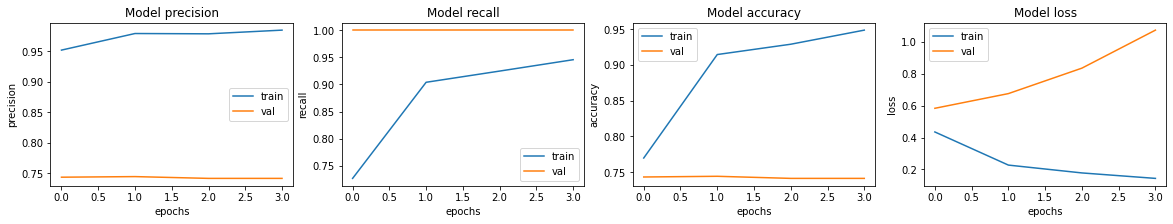

In [128]:
# visualize history
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

- validation data에 분명히 문제가 있다.. loss 값이 점점 커지고 그 이외의 지표는 거의 변함이 없이 일정한 값이 나온다 
- 여기에서 2.22 문제지점을 발견했다. 열심히 수정한 augmentation이 반영되지 않았다. 다시 코드 수정

## ❇️ 4th Training
- augmentation 코드부터 이후의 함수를 포함해 차례로 하나씩 실행하면서 확인

In [129]:
# augmentation function v2
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
    # adjust contrast
    img = tf.image.random_contrast(img, 0.2, 0.5)
    # adjust brightness
    img = tf.image.random_brightness(img, 0.2)
#     img = tf.image.per_image_standardization(img) # 혹시 이 부분을 추가해서 생긴 문제일지도 모르니 제외
    
    # add 3 pixels of padding
    img = tf.image.resize_with_crop_or_pad(img, IMAGE_SIZE[0]+3, IMAGE_SIZE[1]+3)
    # random crop back to the original size
    img = tf.image.random_crop(img, size=[IMAGE_SIZE[0],IMAGE_SIZE[1],3])
    
    return img,label

In [130]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    # data augmentation!
    ds = ds.map(augment, num_parallel_calls=AUTOTUNE)
    
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)  # 32
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

In [131]:
# 데이터셋 다시 구축

# 이미지 형식 변경 함수
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일 경로로 이미지와 레이블 읽어오는 함수
def process_path(file_path):
    label = get_label(file_path) # 레이블 뽑기
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

# train, validation dataset 만들기
# num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE 변수 이용
## AUTOTUNE : 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# test dataset 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

In [132]:
# Data augmentation 
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

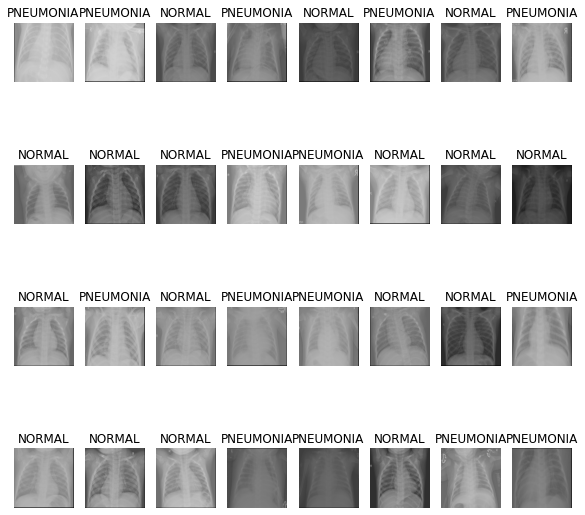

In [133]:
# 배치별로 이미지 확인
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

- 밝기, contrast는 제외해서 다시 augment 함수 수정

In [137]:
# augmentation function v3
def augment(img, label):
    # Randomly flip left or right
    img = tf.image.random_flip_left_right(img)
    
    # add 3 pixels of padding
    img = tf.image.resize_with_crop_or_pad(img, IMAGE_SIZE[0]+3, IMAGE_SIZE[1]+3)
    # random crop back to the original size
    img = tf.image.random_crop(img, size=[IMAGE_SIZE[0],IMAGE_SIZE[1],3])
    
    return img,label

In [138]:
# train, validation dataset 만들기
# num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE 변수 이용
## AUTOTUNE : 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# Data augmentation 
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

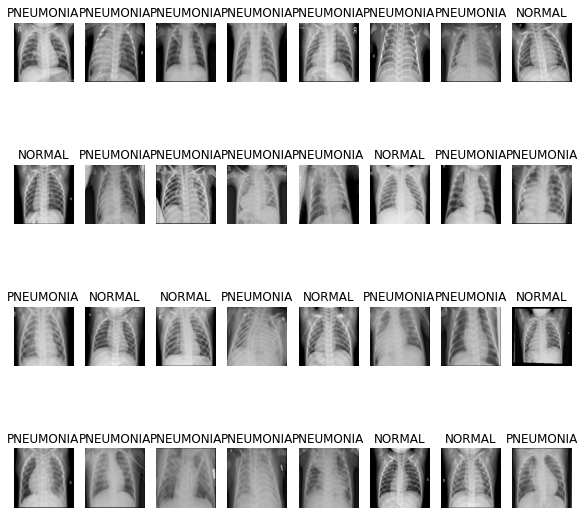

In [139]:
# 배치별로 이미지 확인
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

- 이 데이터셋으로 정말 마지막 모델 학습🙏
---
### ResNet18 모델 학습

In [140]:
# residualblock
'''
n_filter : 각 layer에서 전달
stride : 
    - 기본적으로 1을 사용하고, 
    - `down_sample`이라는 변수를 설정해서 2를 사용하도록 만듬 => skip connection 부분
kernel_size : 3
'''
class ResidualBlock(Model):
    def __init__(self, n_filter: int, down_sample=False):
        super().__init__()
        
        # 여기 안에서만 사용하는 변수라서 변수명 앞에 '__'붙임
        self.__n_filter = n_filter
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]  # down_sample일 경우에, 첫번째 stride=2 
        
        KERNEL_SIZE = (3,3)
        
#         # use He initialization
#         INITIALIZER = "he_normal"
        
        self.conv_1 = SeparableConv2D(self.__n_filter, strides=self.__strides[0],
                           kernel_size=KERNEL_SIZE, padding='same')
        self.bn_1 = BatchNormalization()
        self.conv_2 = SeparableConv2D(self.__n_filter, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same")
        self.bn_2 = BatchNormalization()
        self.merge = Add()
        
        if self.__down_sample:
            # perform down sampling using stride of 2, 1x1 convolution
            self.res_conv = SeparableConv2D(
                self.__n_filter, strides=2, kernel_size=(1, 1), padding="same")
            self.res_bn = BatchNormalization()
        
    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        
        return out

In [141]:
# ResNet18 4 - 1000 fc : sigmoid 수정
'''
num_classes : 분류해야하는 클래스 수
'''
class ResNet18(Model):
    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
            
        # conv1레이어는 직접 만들고
        self.conv_1 = SeparableConv2D(64, (7, 7), strides=2, padding="same")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResidualBlock(64)
        self.res_1_2 = ResidualBlock(64)
        self.res_2_1 = ResidualBlock(128, down_sample=True) # 논문을 보면 여기에서 stride를 2, 1x1 convolution layer를 사용한다
        self.res_2_2 = ResidualBlock(128)
        self.res_3_1 = ResidualBlock(256, down_sample=True)
        self.res_3_2 = ResidualBlock(256)
        self.res_4_1 = ResidualBlock(512, down_sample=True)
        self.res_4_2 = ResidualBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc_1 = Dense(1000, activation="sigmoid") #binary classification이니까 이번엔 sigmoid로 수정
        self.dropout = Dropout(0.2)
        self.fc_2 = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        # 위에서 만든 residual block을 차례로 받기
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, 
                          self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc_1(out)
        out = self.dropout(out)
        out = self.fc_2(out)
        
        return out

In [144]:
# gpu로 모델 빌드, 컴파일
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [145]:
check_point_cb = ModelCheckpoint('resnet18_model_2.keras')

# gpu로 모델학습 4
with tf.device('/GPU:0'):
    history = model.fit(train_ds, 
                        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE, 
                        epochs=EPOCHS,
                        validation_data=val_ds, 
                        validation_steps=VAL_IMG_COUNT // BATCH_SIZE, 
                        class_weight=class_weight,
                        callbacks=[check_point_cb])

Epoch 1/30
130/130 [==============================] - 65s 424ms/step - loss: 0.4401 - accuracy: 0.7829 - precision: 0.9429 - recall: 0.7533 - val_loss: 0.5865 - val_accuracy: 0.7432 - val_precision: 0.7432 - val_recall: 1.0000
Epoch 2/30
130/130 [==============================] - 54s 413ms/step - loss: 0.2363 - accuracy: 0.9127 - precision: 0.9722 - recall: 0.9081 - val_loss: 0.7395 - val_accuracy: 0.7432 - val_precision: 0.7432 - val_recall: 1.0000
Epoch 3/30
130/130 [==============================] - 53s 407ms/step - loss: 0.2008 - accuracy: 0.9243 - precision: 0.9750 - recall: 0.9217 - val_loss: 1.0741 - val_accuracy: 0.7393 - val_precision: 0.7393 - val_recall: 1.0000
Epoch 4/30
130/130 [==============================] - 54s 418ms/step - loss: 0.1756 - accuracy: 0.9382 - precision: 0.9774 - recall: 0.9384 - val_loss: 1.4688 - val_accuracy: 0.7402 - val_precision: 0.7402 - val_recall: 1.0000
Epoch 5/30
130/130 [==============================] - 57s 440ms/step - loss: 0.1575 - accura

### 결과 시각화

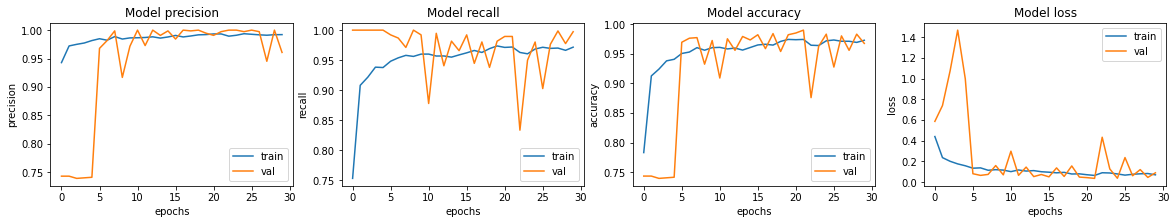

In [146]:
# visualize history
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

### Evaluate model

In [147]:
# evaluate model
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

20/20 [==============================] - 5s 249ms/step - loss: 1.8533 - accuracy: 0.6667 - precision: 0.6522 - recall: 1.0000
Loss: 1.8532793521881104,
Accuracy: 0.6666666865348816,
Precision: 0.6521739363670349,
Recall: 1.0


In [148]:
# check f1 score
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1_score(precision, recall))

precision: 0.6521739363670349
recall: 1.0
f1_score: 0.7894737012993923


---
---

## Summary

- 이번 프로젝트는 공부한 내용만 구현하는게 아니라 
    - tf.data pipeline 관련 자료를 파악하고 이에 맞춰서 정보를 종합해야했고,
    - 그림을 보고 구조를 구현해야야해서 기존의 프로젝트와는 비교할수 없이 어려웠다.
- 중간에 포기하고 싶은 순간이 여럿 있었는데, 역시 포기해야할 순간을 빨리 알아채는게 중요하다.
- 이번 모듈 바로 직전엔 그동안 공부한게 연결되면서 이제 조금 알아가나보다 싶었는데, 이번 프로젝트를 끝내고 나니 이제 진짜 공부 시작이구나 싶다.
- 여러 API를 종합해서 사용하는게 정말 어려웠는데, 각 API마다 사용하는 데이터 형식이 다 다르기때문에 이를 맞추는게 큰 관문이었다.
- CNN 모델로도 ResNet18모델로도 좋은 정확도를 도출해내지 못했지만, 이번 프로젝트에서는 여러 API를 활용해보고, 문제 해결을 시도해본 공부였다고 종합하려고한다.

---

## 회고 2

**[KEEP]**

- 중요한건 꺾이지 않는 마음 2😇
- tf.data pipeline에 대해 아주 미미한 지식이 생겼다
- 첫번째 작업때보다 논문을 조금 더 꼼꼼히 읽어보았고, 그동안 공부했던 내용을 다시 복습해가며 작성한 코드에 대해서는 확실히 이해했다.

**[PROBLEM]**

- 학습이 잘 되지 않았고, 하이퍼파라미터 최적화 작업에서는 여러 에포크동안 동일한 학습결과가 나왔는데 어떤 지점부터 해결해야할지 찾는게 쉽지 않았다.
- data augmentation을 진행했지만 이 작업을 한 후에 총 데이터 수는 어떻게 되는지 이후 데이터셋에 대한 이해가 부족했다.
- 수정한 부분들이 쌓이면서 여러 단계중에 최종 코드가 구별되지 않았고, 일부 단계를 빠뜨리는 실수가 생겼다.
- 그림을 참고해서 모델을 구현해야했는데, 논문이나 관련 자료에서 정확한 세부 내용을 파악하는게 어려웠고, 다급하게 코드를 만들다가 결국 일부분 빠뜨리고 작성하는 실수를 했다.

**[TRY]**

- 성능이 잘 나왔던 이전 모델에 이 데이터셋을 활용해서 데이터셋이 문제인지, 모델에서 문제가 있는지 점검해본다.
- 너무 다급하게 생각하지말고, 천천히 과정을 쌓아간다고 생각하자.
- [텐서플로우 공식문서](https://www.tensorflow.org/api_docs/python/tf)와 [케라스 공식문서-API](https://keras.io/api/)에 공부할만한 자료가 많았다. 이해가 바로 안가거나, 바로 사용하지 않을것 같은 내용이더라도 일단 한번 읽어본다는 생각으로 공부해보는것도 좋겠다.